In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
from scipy.signal import detrend

In [2]:
#import dask to parallelise
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

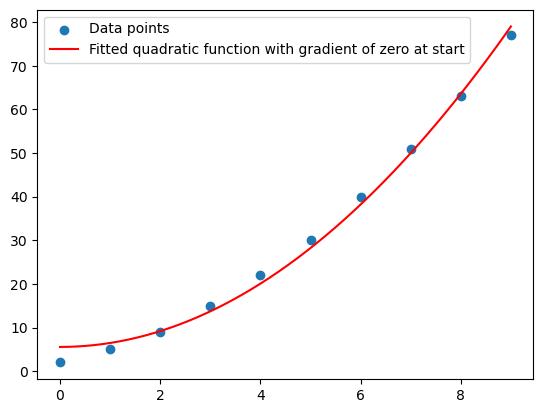

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define your data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 5, 9, 15, 22, 30, 40, 51, 63, 77])

# Objective function for the least squares method
def objective_function(params, x, y):
    a, b, c = params
    return np.sum((y - (a * x**2 + b * x + c))**2)

# Constraint: quadratic starts with a gradient of zero
x0 = x[0]
y0 = y[0]
initial_params = np.array([0, 0, y0])

constraint = {
    'type': 'eq',
    'fun': lambda params: 2 * params[0] * x0 + params[1]
}

result = minimize(objective_function, initial_params, args=(x, y), constraints=[constraint])

# Get the coefficients of the fitted quadratic function
a, b, c = result.x

# Generate x values for the fitted curve
x_fit = np.linspace(min(x), max(x), 1000)

# Compute the corresponding y values
y_fit = a * x_fit ** 2 + b * x_fit + c

# Plot the data points and the fitted quadratic function
plt.scatter(x, y, label='Data points')
plt.plot(x_fit, y_fit, color='red', label='Fitted quadratic function with gradient of zero at start')
plt.legend()
plt.show()


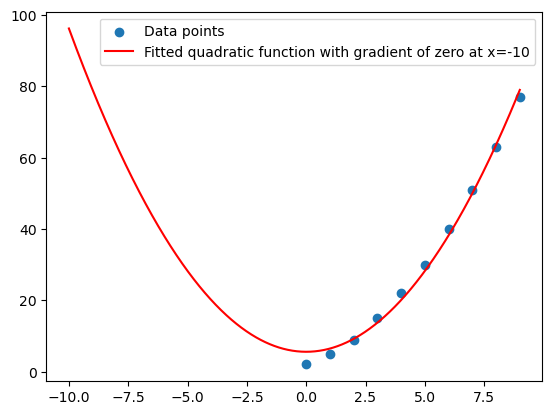

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define your data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 5, 9, 15, 22, 30, 40, 51, 63, 77])

# Objective function for the least squares method
def objective_function(params, x, y):
    a, b, c = params
    return np.sum((y - (a * (x+10)**2 + b * (x+10) + c))**2)

# Constraint: quadratic starts with a gradient of zero
x0 = x[0]
y0 = y[0]
initial_params = np.array([0, 0, y0])

constraint = {
    'type': 'eq',
    'fun': lambda params: 2 * params[0] * (x0+10) + params[1]
}

result = minimize(objective_function, initial_params, args=(x, y), constraints=[constraint])

# Get the coefficients of the fitted quadratic function
a, b, c = result.x

# Generate x values for the fitted curve
x_fit = np.linspace(min(x)-10, max(x), 1000)

# Compute the corresponding y values
y_fit = a * (x_fit+10) ** 2 + b * (x_fit+10) + c

# Plot the data points and the fitted quadratic function
plt.scatter(x, y, label='Data points')
plt.plot(x_fit, y_fit, color='red', label='Fitted quadratic function with gradient of zero at x=-10')
plt.legend()
plt.show()


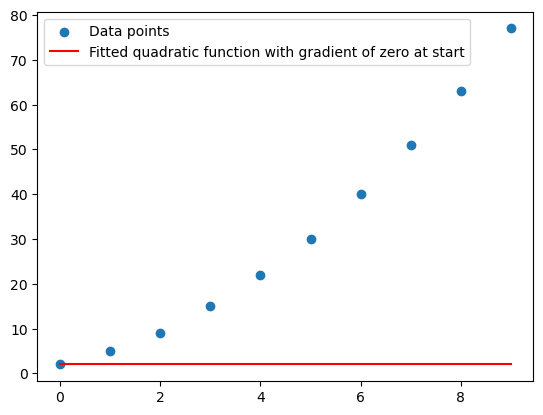

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define your data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 5, 9, 15, 22, 30, 40, 51, 63, 77])

# Objective function for the least squares method
def objective_function(params, x, y):
    a, b, c = params
    return np.sum((y - (a * x**2 + b * x + c))**2)

# Constraint: quadratic starts with a gradient of zero
x0 = x[0]
y0 = y[0]
initial_params = np.array([0, 0, y0])

constraint = {
    'type': 'eq',
    'fun': lambda params: 2 * params[0] * x0
}

result = minimize(objective_function, initial_params, args=(x, y), constraints=[constraint])

# Get the coefficients of the fitted quadratic function
a, b, c = result.x

# Generate x values for the fitted curve
x_fit = np.linspace(min(x), max(x), 1000)

# Compute the corresponding y values
y_fit = a * x_fit ** 2 + b * x_fit + c

# Plot the data points and the fitted quadratic function
plt.scatter(x, y, label='Data points')
plt.plot(x_fit, y_fit, color='red', label='Fitted quadratic function with gradient of zero at start')
plt.legend()
plt.show()


In [6]:
constraint

{'type': 'eq', 'fun': <function __main__.<lambda>(params)>}

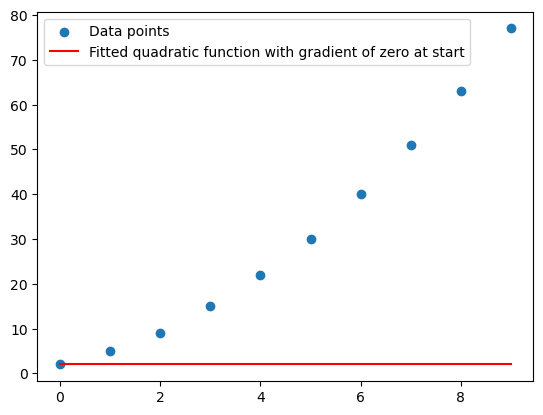

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define your data points
x = np.array([x1, x2, x3, ..., xn])
y = np.array([y1, y2, y3, ..., yn])

# Objective function for the least squares method
def objective_function(params, x, y):
    a, b, c = params
    return np.sum((y - (a * x**2 + b * x + c))**2)

# Constraint: quadratic starts with a gradient of zero
x0 = x[0]
y0 = y[0]
initial_params = np.array([0, 0, y0])

constraint = {
    'type': 'eq',
    'fun': lambda params: 2 * params[0] * x0
}

result = minimize(objective_function, initial_params, args=(x, y), constraints=[constraint])

# Get the coefficients of the fitted quadratic function
a, b, c = result.x

# Generate x values for the fitted curve
x_fit = np.linspace(min(x), max(x), 1000)

# Compute the corresponding y values
y_fit = a * x_fit ** 2 + b * x_fit + c

# Plot the data points and the fitted quadratic function
plt.scatter(x, y, label='Data points')
plt.plot(x_fit, y_fit, color='red', label='Fitted quadratic function with gradient of zero at start')
plt.legend()
plt.show()

In [2]:
#load observational SST
oiv2 = xr.open_dataset("/g/data/e14/sm2435/ACCESS_PIctrl/oisstv2.nc", chunks = {'time':12}).sst
#rename coords
oiv2 = oiv2.rename({"lon": "longitude", "lat": "latitude"})
oiv2 = oiv2.compute()
#load the lsm
lsm = xr.open_dataset("/g/data/e14/sm2435/ACCESS_PIctrl/oisstv2_lsm.nc").mask
#rename coords
lsm = lsm.rename({"lon": "longitude", "lat": "latitude"})
oiv2 = oiv2.where(lsm[0]==1)
oiv2 = oiv2.sel(time = slice("1982-01-01", "2020-12-31"))

In [3]:
#load observational SST
ersstv5 = xr.open_dataset("/g/data/e14/sm2435/PO_model_clim/ersstv5.nc", chunks = {'time':12}).sst
#rename coords
ersstv5 = ersstv5.rename({"lon": "longitude", "lat": "latitude"})
#ersstv5 =ersstv5.sel(time = slice("1981-12-01", "2020-12-31"))
ersstv5 = ersstv5.compute()

In [3]:
#load observational SST
hadsst = xr.open_dataset("/g/data/e14/sm2435/ACCESS_PIctrl/HadISST.nc", chunks = {'time':12}).sst
#rename coords
hadsst = hadsst.rename({"lon": "longitude", "lat": "latitude"})
hadsst =hadsst.sel(time = slice("1900-01-01", "2020-12-31"))
hadsst = hadsst.compute()

In [4]:
def detrend_dim(da, dim, deg=1):
    #detrend the anomaly
    #daa = (da.groupby('time.month') - da.sel(time=slice('1961-01-01', '1990-12-31')).groupby('time.month').mean('time')).drop('month')
    # detrend along a single dimension
    daa = da
    p = daa.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(daa[dim], p.polyfit_coefficients)
    return fit

In [5]:
hadsst1 = xr.where(hadsst == -1000, np.nan, hadsst)

In [5]:
deg2  = detrend_dim(hadsst1, dim = "time", deg = 2)
deg3  = detrend_dim(hadsst1, dim = "time", deg = 3)
deg4  = detrend_dim(hadsst1, dim = "time", deg = 4)
deg5  = detrend_dim(hadsst1, dim = "time", deg = 5)

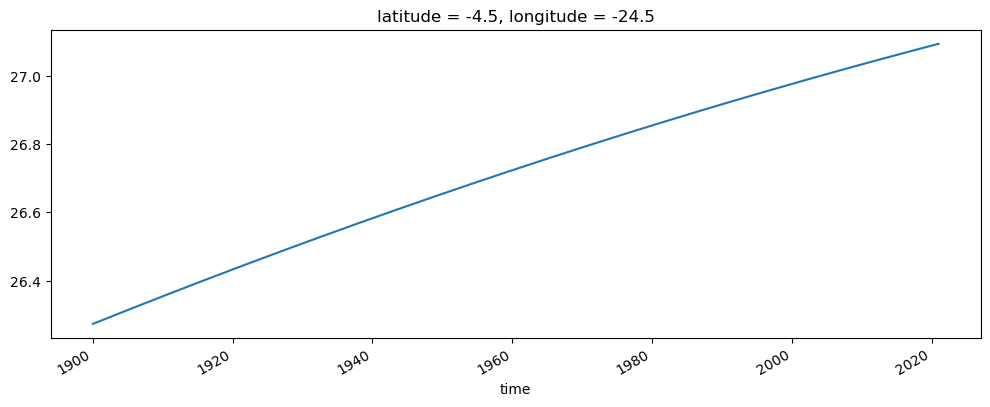

In [6]:
plt.figure(figsize = (12,4))
#(hadsst1).sel(longitude=70.0, latitude=-5.0, method='nearest').plot()

(deg2).sel(longitude=-25.0, latitude=-5.0, method='nearest').plot()
#(deg3).sel(longitude=70.0, latitude=-5.0, method='nearest').plot()
#(deg4).sel(longitude=70.0, latitude=-5.0, method='nearest').plot()
#(deg5).sel(longitude=70.0, latitude=-5.0, method='nearest').plot()


In [9]:
VALS = (hadsst1).sel(longitude=70.0, latitude=-5.0, method='nearest').values
X = np.linspace(0,len(VALS), len(VALS))

In [10]:
poly = np.polyfit(X, (hadsst1).sel(longitude=70.0, latitude=-5.0, method='nearest'), deg=2)

In [11]:
PI = np.linspace(-50*12,len(VALS),50*12+len(VALS))

In [5]:
import pandas as pd

In [6]:
start_date = '1850-01-01'
end_date = '2020-12-01'

# Create a list of dates with monthly frequency
dates = xr.cftime_range(start=start_date, end=end_date, freq='MS')

In [7]:
datetime_index = pd.date_range(start=start_date, end=end_date, freq='MS')

In [8]:
datetime_index

DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=2052, freq='MS')

In [9]:
dates

CFTimeIndex([1850-01-01 00:00:00, 1850-02-01 00:00:00, 1850-03-01 00:00:00,
             1850-04-01 00:00:00, 1850-05-01 00:00:00, 1850-06-01 00:00:00,
             1850-07-01 00:00:00, 1850-08-01 00:00:00, 1850-09-01 00:00:00,
             1850-10-01 00:00:00,
             ...
             2020-03-01 00:00:00, 2020-04-01 00:00:00, 2020-05-01 00:00:00,
             2020-06-01 00:00:00, 2020-07-01 00:00:00, 2020-08-01 00:00:00,
             2020-09-01 00:00:00, 2020-10-01 00:00:00, 2020-11-01 00:00:00,
             2020-12-01 00:00:00],
            dtype='object', length=2052, calendar='standard', freq='MS')

In [10]:
clim = hadsst1.groupby('time.month').mean('time')

In [6]:
#anoms = (hadsst1.groupby('time.month') - (hadsst1.sel(time=slice('1961-01-01', '1990-12-31')).groupby('time.month').mean('time'))).drop('month')
anoms = (hadsst1.groupby('time.month') - hadsst1.groupby('time.month').mean('time')).drop('month')

In [7]:
da = anoms

In [9]:
import pandas as pd

In [10]:
new_time = pd.date_range('1850-01-16', '1900-01-16', freq='M')

# create a new data array with zeros and the same dimensions as the original array
new_data = np.zeros((len(new_time)))
new_data[:] = np.nan #delete if i want to go back to zeros in middle

# create a new xarray DataArray with the new time index and the zero-filled data
new_array = xr.DataArray(new_data, coords=[new_time], dims=['time'])

# concatenate the new array with the original array along the time dimension
concatenated_array = xr.concat([new_array, da], dim='time')

In [11]:
import xarray as xr
import pandas as pd

# assume your original DataArray is called `da`

# create a new time coordinate with monthly frequency for the years 1780-1800
new_times = pd.date_range(start='1679-01', end='1850-1', freq='M')
# create a new DataArray with the time coordinate and fill with NaNs
da_1680_1849 = xr.DataArray(data=np.nan, dims=('time', 'lat', 'lon'), coords={'time': new_times})

# select the slice of data from 1900 to 2020
da_1850_2020 = concatenated_array.sel(time=slice('1850-01-01', '2020-12-31'))

# reverse the order of the data along the time axis
da_1680_1849_data = da_1850_2020.isel(time=slice(None, None, -1))

# update the time coordinate to reflect the new time period
da_1680_1849_data['time'] = new_times

# reindex the data to add the new months from 1780-1800
da_1680_1849_data = da_1680_1849_data.reindex(time=da_1680_1849.time)

# concatenate the three slices along the time axis to get the final DataArray
da_symmetric = xr.concat([da_1680_1849_data, da_1850_2020], dim='time')


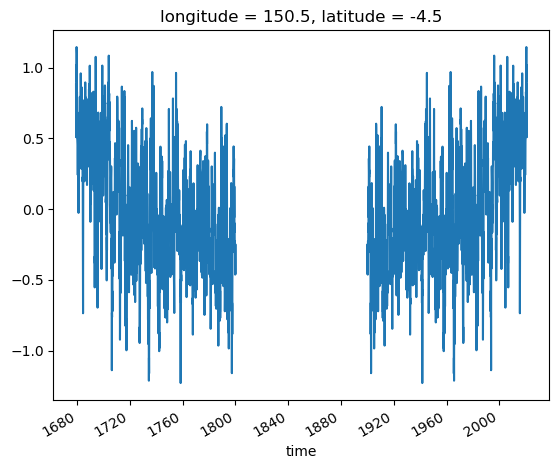

In [12]:
da_symmetric.sel(longitude=150.0, latitude=-5.0, method='nearest').plot()

In [13]:
pv = da_symmetric.polyfit(dim = 'time', deg = 2)###THIS is the solution!

In [14]:
q = xr.polyval(da_symmetric.time, pv)

In [15]:
detrend_had = hadsst1 - q.polyfit_coefficients

In [16]:
(detrend_had.groupby('time.month').mean('time') - hadsst1.groupby('time.month').mean('time')).sel(longitude=-40.0, latitude=-20.0, method='nearest')

<xarray.DataArray (month: 12)>
array([ 0.00472268,  0.00388077,  0.00304471,  0.00217934,  0.00131674,
        0.00045042, -0.00041605, -0.00129584, -0.00216506, -0.00303027,
       -0.00390141, -0.00476939])
Coordinates:
    longitude  float64 -39.5
    latitude   float64 -19.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
(hadsst1).sel(longitude=-40.0, latitude=-20.0, method='nearest').plot(alpha = 0.5)
(25.5+q.polyfit_coefficients).sel(longitude=-40.0, latitude=-20.0, method='nearest').plot(alpha  = 0.5)
(hadsst1 - q.polyfit_coefficients).sel(longitude=-40.0, latitude=-20.0, method='nearest').plot(alpha = 0.5)

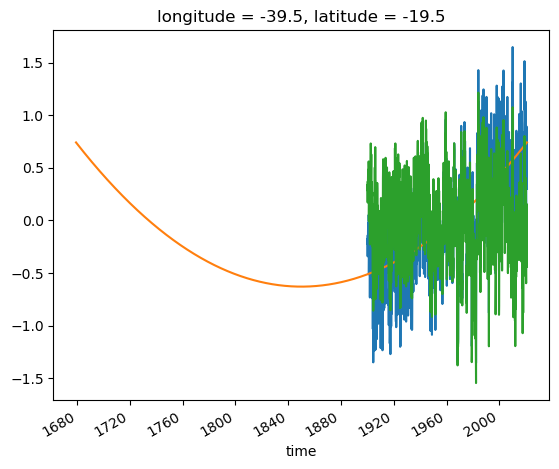

In [21]:
anoms.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()
q.polyfit_coefficients.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()
(anoms - q.polyfit_coefficients).sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()

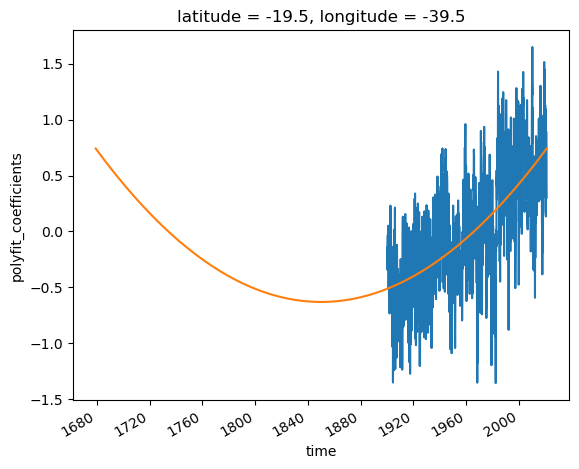

In [43]:
anoms.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()
q.polyfit_coefficients.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()

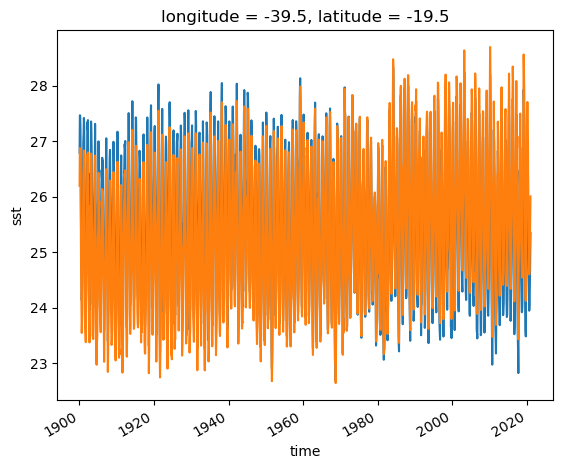

In [67]:
detrend_had.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()
hadsst1.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()

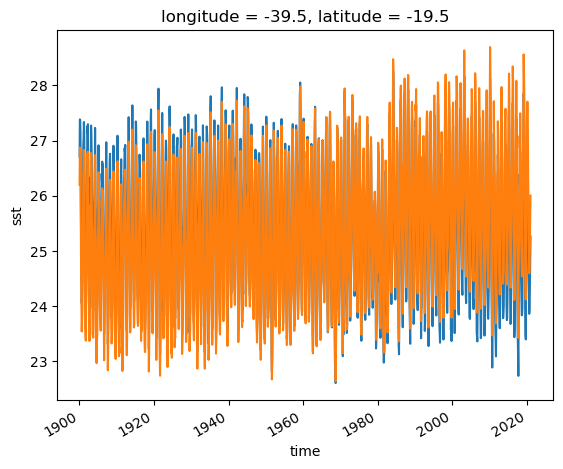

In [18]:
detrend_had.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()
hadsst1.sel(longitude=-40.0, latitude=-20.0, method='nearest').plot()

In [19]:
hadsst1.groupby('time.month').mean('time').sel(longitude=100.0, latitude=-20.0, method='nearest')

<xarray.DataArray 'sst' (month: 12)>
array([25.055593, 25.540503, 25.69976 , 25.482584, 24.776985, 24.020452,
       23.48081 , 23.004627, 23.132235, 23.408972, 23.949354, 24.518003],
      dtype=float32)
Coordinates:
    longitude  float64 100.5
    latitude   float64 -19.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

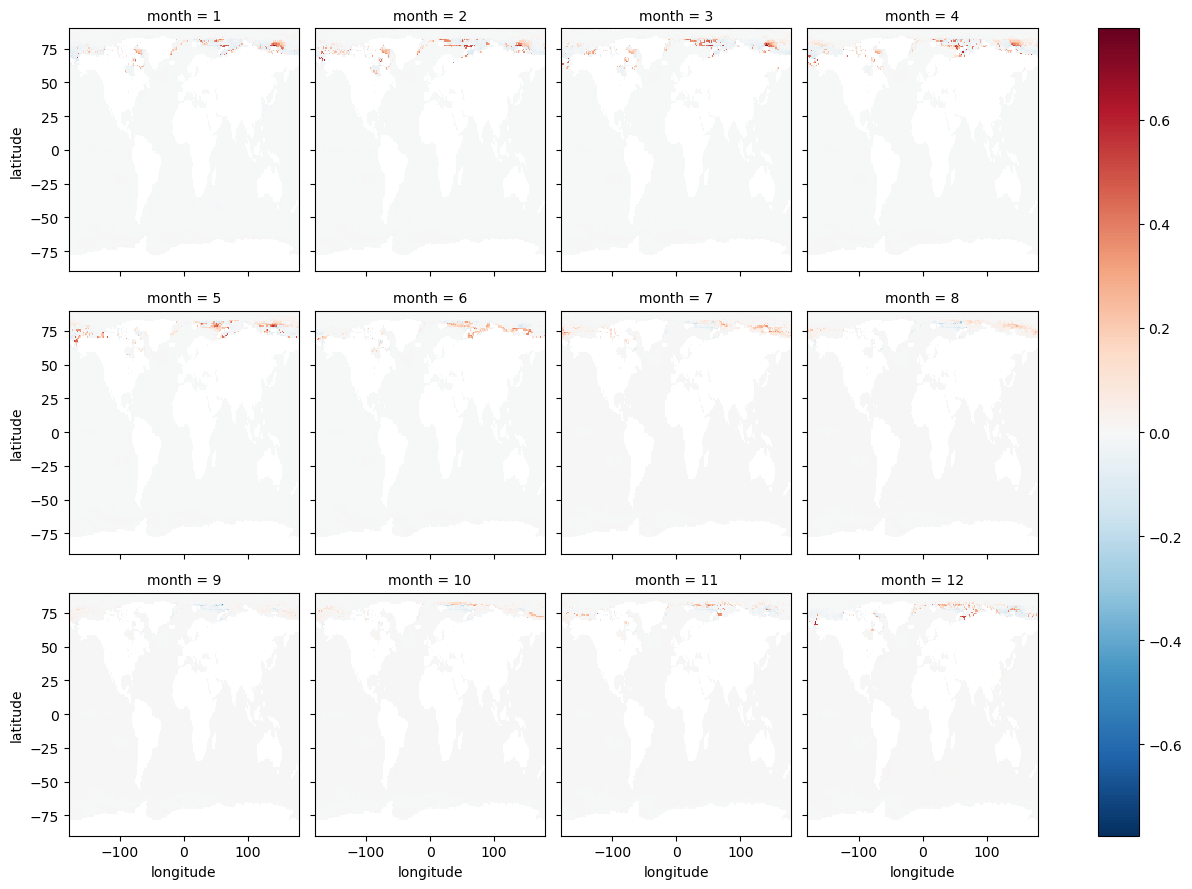

In [20]:
(hadsst1.groupby('time.month').mean('time') - detrend_had.groupby('time.month').mean('time')).plot(col = 'month', col_wrap = 4)#, vmin = -0.01, vmax  = 0.01, cmap = 'bwr')

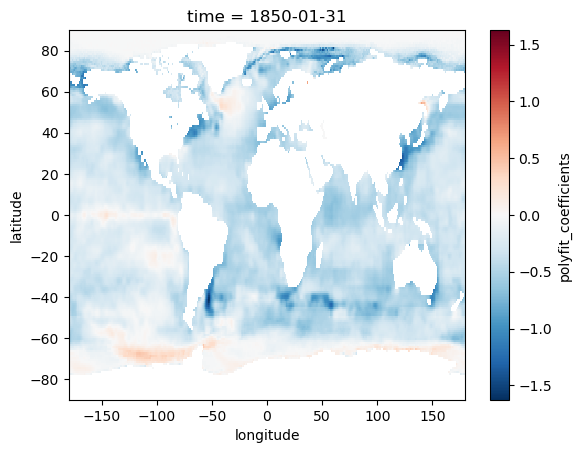

In [29]:
q.polyfit_coefficients[12*171].plot()

In [22]:
q.polyfit_coefficients[0]

<xarray.DataArray 'polyfit_coefficients' (latitude: 180, longitude: 360)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-1.00759412e-08, -1.92856498e-09, -9.17977963e-10, ...,
        -8.12573077e-09, -2.28156418e-08, -1.19150528e-08],
       [-2.45738067e-08, -3.27853753e-08, -2.73965075e-08, ...,
        -3.13044913e-08, -4.25148955e-08, -3.67901548e-08],
       [ 7.17961251e-04, -4.25582232e-08,  7.07038293e-04, ...,
         7.36415818e-04,  7.33774950e-04,  7.22506844e-04]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    time       datetime64[ns] 1679-01-31

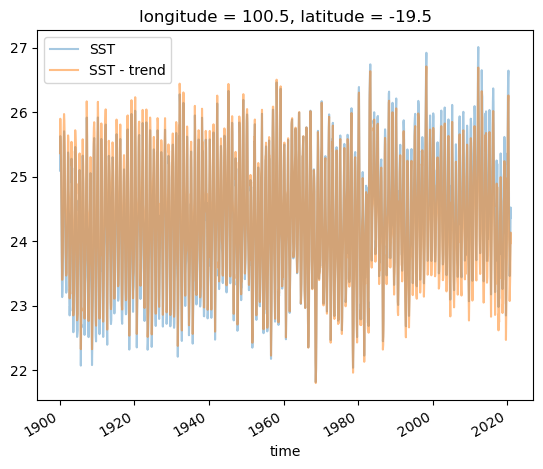

In [23]:
hadsst1.sel(longitude=100.0, latitude=-20.0, method='nearest').plot(alpha = 0.4, label = "SST")
(hadsst1-q.polyfit_coefficients).sel(longitude=100.0, latitude=-20.0, method='nearest').plot(alpha = 0.5, label = "SST - trend")
#(hadsst1-q.polyfit_coefficients[0].values).sel(longitude=70.0, latitude=10.0, method='nearest').plot(alpha = 0.5, label = "SST - quad@1850")
plt.legend()

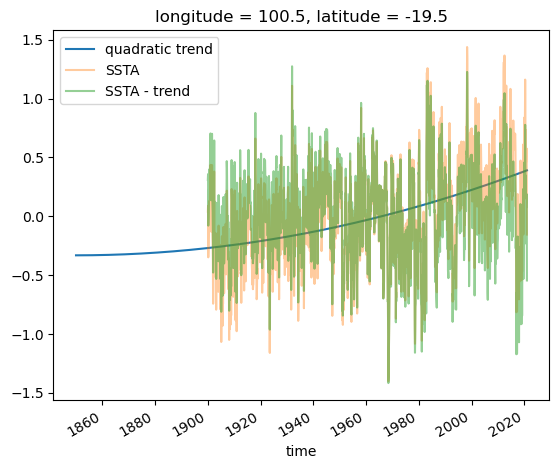

In [24]:
q.polyfit_coefficients.sel(longitude=100.0, latitude=-20.0, method='nearest').sel(time = slice("1850-01-01", "2020-12-31")).plot(label = "quadratic trend")
concatenated_array.sel(longitude=100.0, latitude=-20.0, method='nearest').plot(alpha = 0.4, label = "SSTA")
(concatenated_array-q.polyfit_coefficients).sel(longitude=100.0, latitude=-20.0, method='nearest').plot(alpha = 0.5, label = "SSTA - trend")
plt.legend()

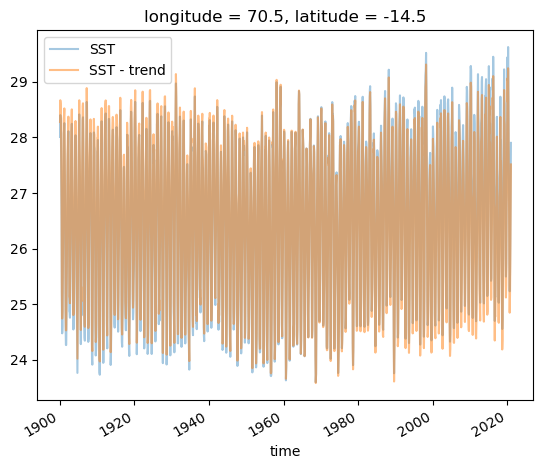

In [25]:
#q.polyfit_coefficients.sel(longitude=160.0, latitude=50.0, method='nearest').sel(time = slice("1850-01-01", "2020-12-31")).plot(label = "quadratic trend")
hadsst1.sel(longitude=70.0, latitude=-15.0, method='nearest').plot(alpha = 0.4, label = "SST")
(hadsst1-q.polyfit_coefficients).sel(longitude=70.0, latitude=-15.0, method='nearest').plot(alpha = 0.5, label = "SST - trend")
plt.legend()

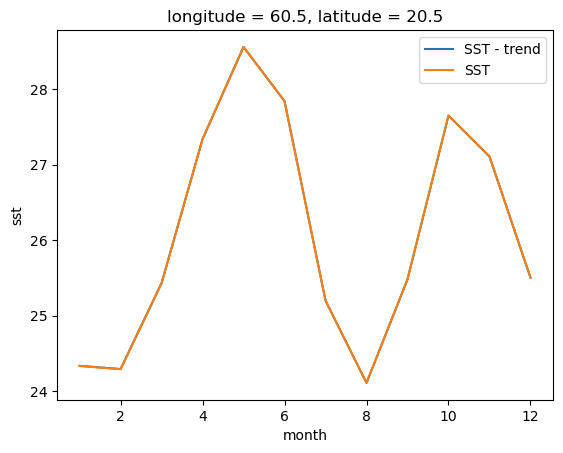

In [26]:
(hadsst1 - (q.polyfit_coefficients.sel(time = slice("1900-01-01", "2020-12-31")))).groupby('time.month').mean('time').sel(longitude=60.0, latitude=20.0, method='nearest').plot(label = "SST - trend")
(hadsst1).sel(time = slice("1900-01-01", "2020-12-31")).groupby('time.month').mean('time').sel(longitude=60.0, latitude=20.0, method='nearest').plot(label = "SST")
plt.legend()

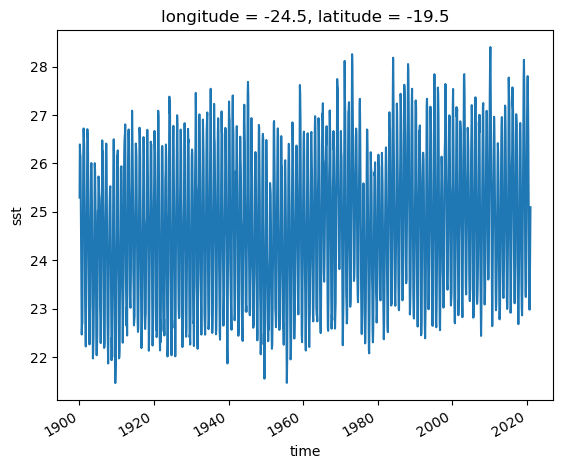

In [52]:
q.polyfit_coefficients.sel(longitude=-25.0, latitude=-20.0, method='nearest').plot(label = "SST - trend")

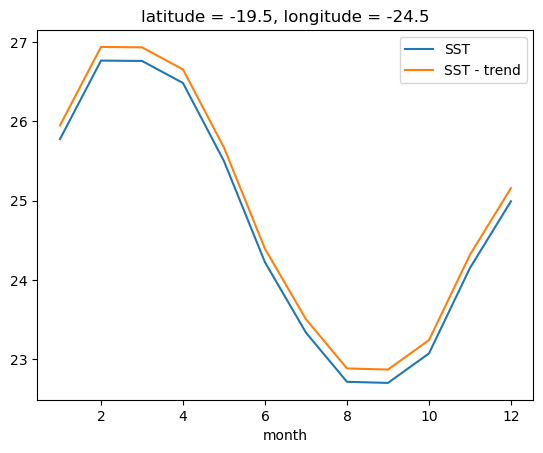

In [49]:
hadsst1.sel(longitude=-25.0, latitude=-20.0, method='nearest').groupby('time.month').mean('time').plot(label = "SST")
(hadsst1-q.polyfit_coefficients.sel(time = slice("1850-01-01", "2020-12-31"))).sel(longitude=-25.0, latitude=-20.0, method='nearest').groupby('time.month').mean('time').plot(label = "SST - trend")
plt.legend()

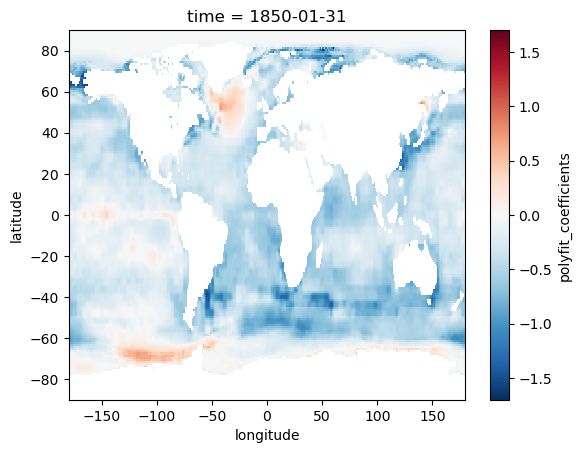

In [48]:
q.polyfit_coefficients[12*171].plot()

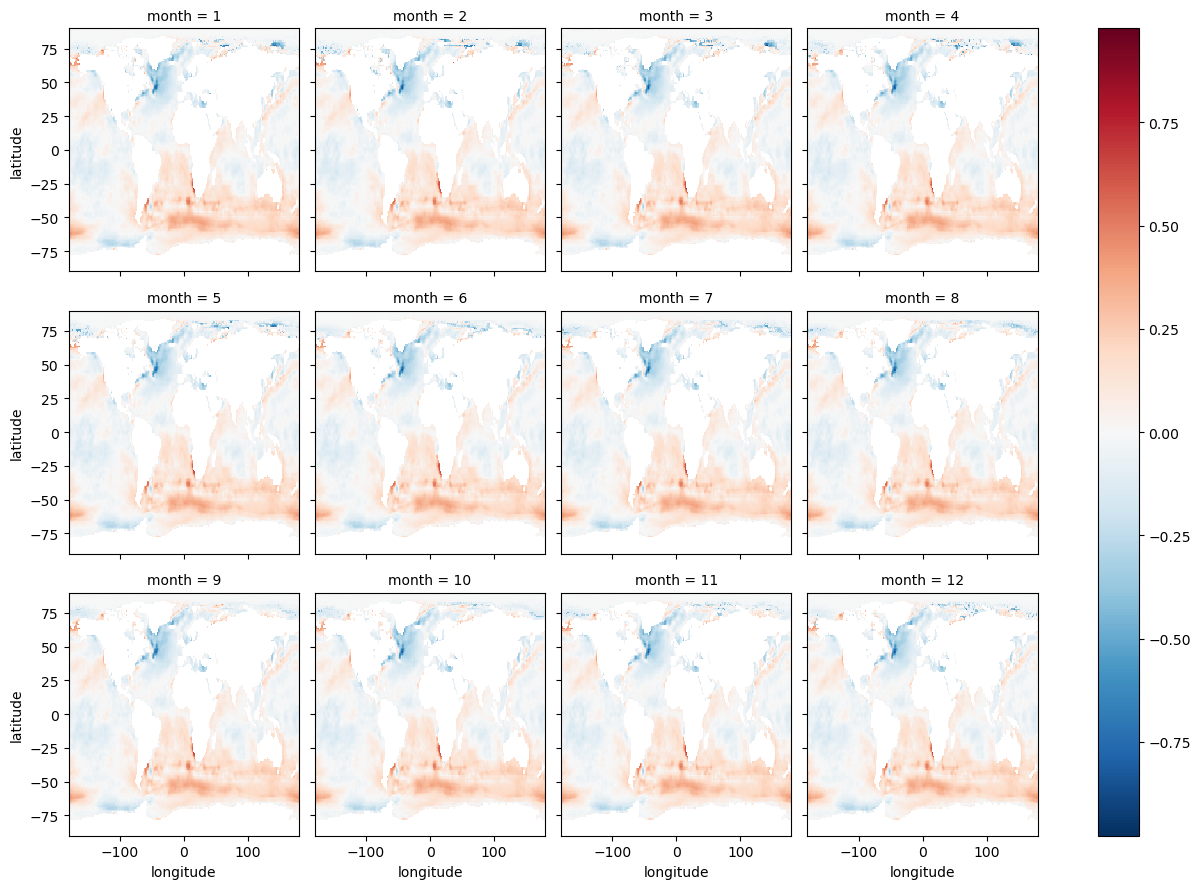

In [39]:
((hadsst1 - (q.polyfit_coefficients.sel(time = slice("1900-01-01", "2020-12-31")))).groupby('time.month').mean('time') -
        hadsst1.groupby('time.month').mean('time')).plot(col = 'month', col_wrap = 4)

In [26]:
detrend = hadsst1 - q.polyfit_coefficients

In [27]:
detrend_clim = detrend.groupby('time.month').mean('time')

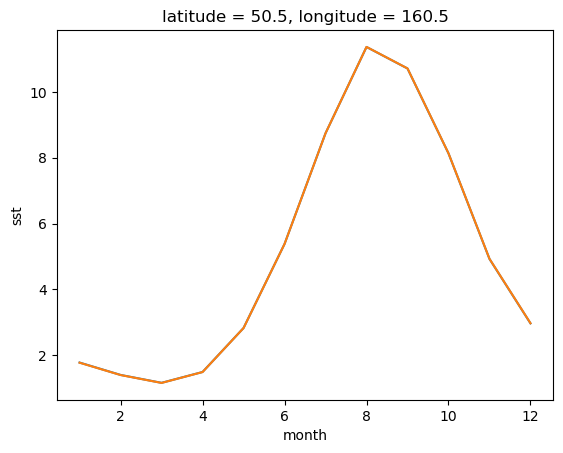

In [28]:
detrend.sel(longitude=160.0, latitude=50.0, method='nearest').groupby('time.month').mean('time').plot()
hadsst1.sel(longitude=160.0, latitude=50.0, method='nearest').groupby('time.month').mean('time').plot()
#detrend_clim2.sel(longitude=160.0, latitude=10.0, method='nearest').plot()

In [29]:
clim_1900 = (hadsst1 - q.polyfit_coefficients.sel(time = slice("1900-01-01", "2020-12-31"))).groupby('time.month').mean('time')

In [30]:
clim.sel(longitude=140.0, latitude=10.0, method='nearest')

<xarray.DataArray 'sst' (month: 12)>
array([27.920803, 27.78618 , 27.796757, 28.332191, 28.78505 , 29.112581,
       29.004065, 29.001905, 29.089964, 29.081532, 28.968813, 28.532022],
      dtype=float32)
Coordinates:
    longitude  float64 140.5
    latitude   float64 10.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [31]:
detrend_clim.sel(longitude=140.0, latitude=10.0, method='nearest')

<xarray.DataArray (month: 12)>
array([27.92370562, 27.788565  , 27.7986274 , 28.33352977, 28.78585859,
       29.11285683, 29.0038086 , 29.00110802, 29.08863534, 29.07966836,
       28.96641476, 28.52909214])
Coordinates:
    longitude  float64 140.5
    latitude   float64 10.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [40]:
#scale climatology of hadsst by value at 1850
clim_scaled = clim - q.polyfit_coefficients[0]

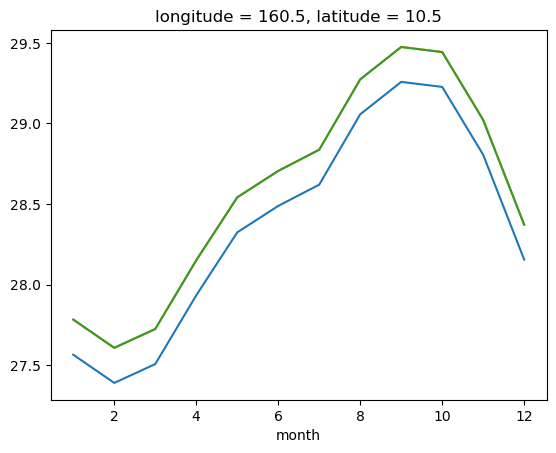

In [64]:
clim_scaled.sel(longitude=160.0, latitude=10.0, method='nearest').plot()
clim.sel(longitude=160.0, latitude=10.0, method='nearest').plot()
detrend_clim.sel(longitude=160.0, latitude=10.0, method='nearest').plot()

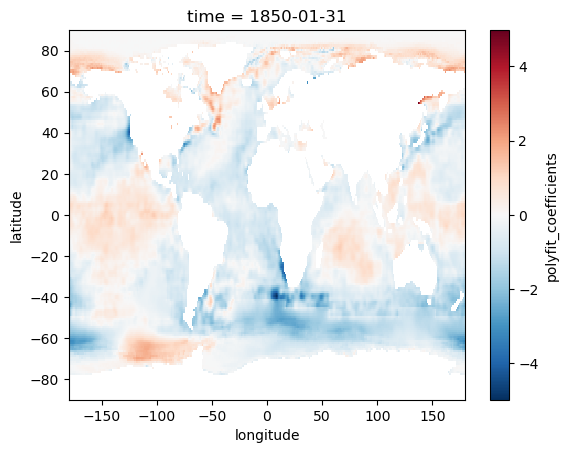

In [26]:
pv = concatenated_array.polyfit(dim = 'time', deg = 2)###THIS is the solution!
q = xr.polyval(da_symmetric.time, pv)
q.polyfit_coefficients[12*171].plot()

In [22]:
test = da_symmetric.interpolate_na(dim = 'time', method = 'spline')#.sel(longitude=150.0, latitude=-0.0, method='nearest').plot()

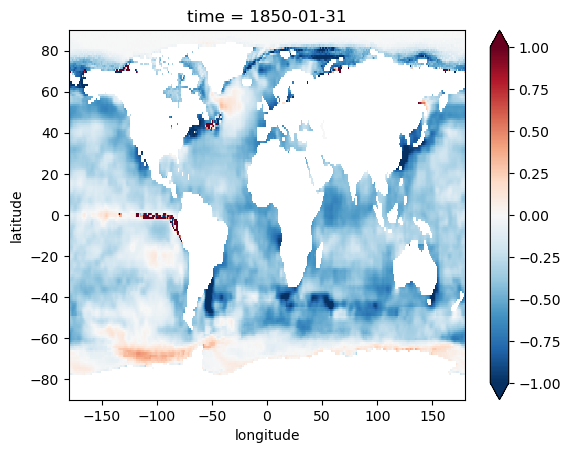

In [28]:
test[12*171].plot(vmin = -1, vmax = 1, cmap = 'RdBu_r')

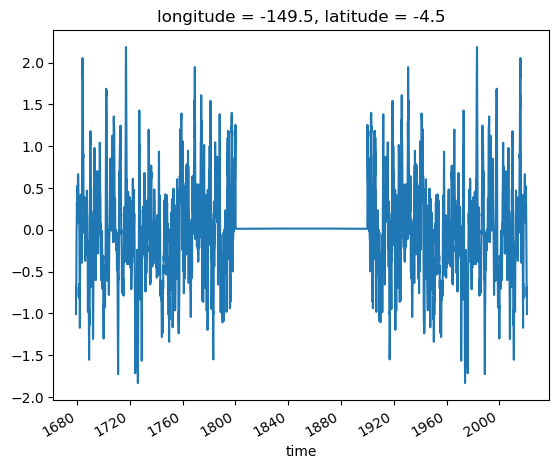

In [26]:
test.sel(longitude=-150.0, latitude=-5.0, method='nearest').plot()

In [35]:
def fit_quadratic(vals):
    time = np.arange(len(vals))
    time2 = np.arange(-50*12, len(vals))

    poly = np.polyfit(time, vals, deg=2)
    #if poly[0] < 0:
    #    poly = -poly
    return np.polyval(poly, time)

In [36]:
extrapolated_values = np.apply_along_axis(fit_quadratic, axis=0, arr=da_symmetric.values)


In [37]:
extrapolated_da = xr.DataArray(extrapolated_values, coords={"longitude":hadsst1.longitude, "latitude":hadsst1.latitude, "time":da_symmetric.time}, dims=hadsst1.dims)


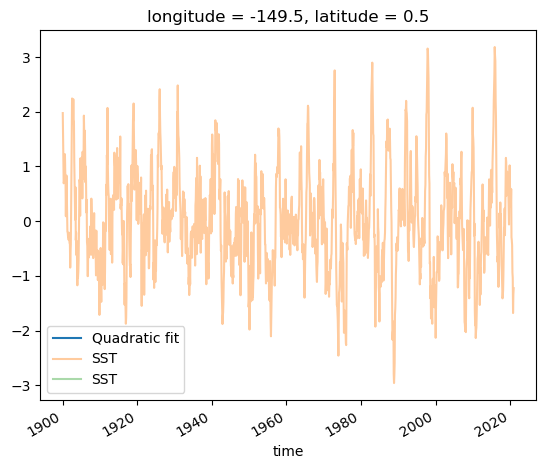

In [38]:
import datetime
extrapolated_da.sel(longitude=-150.0, latitude=-0.0, method='nearest').plot(label = 'Quadratic fit')
concatenated_array.sel(longitude=-150.0, latitude=-0.0, method='nearest').plot(alpha = 0.4, label = 'SST')
#plt.xlim([datetime.date(1850, 1, 1), datetime.date(2020, 12, 31)])
(concatenated_array + extrapolated_da[0]).sel(longitude=-150.0, latitude=-0.0, method='nearest').plot(alpha = 0.4, label = 'SST')
plt.legend()

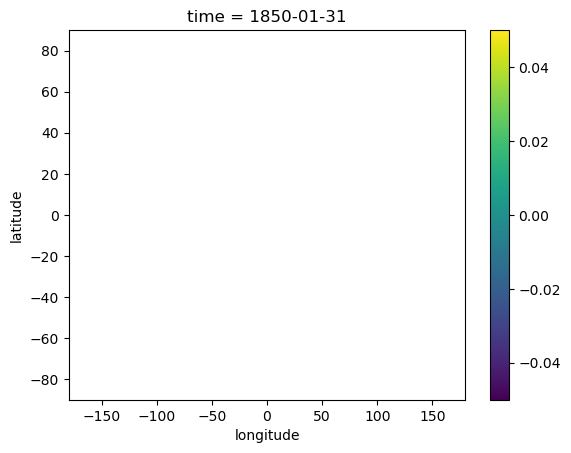

In [39]:
extrapolated_da[171*12].plot()

In [22]:
#extrapolated da is the GW signal to remove from the climatology

In [23]:
trend = extrapolated_da[171*12]

In [24]:
detrend = hadsst1 - extrapolated_da

In [25]:
clim = detrend.groupby('time.month').mean('time')

In [26]:
ctrl_sst = xr.open_dataset("/g/data/e14/sm2435/PO_model_clim/ctrl_sst.nc", chunks = {'time':12})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/core/indexing.py:535: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [27]:
ctrl_sst = ctrl_sst.sel(time = slice('0955-01-16','1100-12-16' ))

In [28]:
def regrid_ACCESS(ds):
    #rename coords
    ds = ds.rename({"geolon_t": "longitude", "geolat_t": "latitude"})
    #create the output grid
    ds_out = xe.util.grid_global(1, 1)
    ds_out = ds_out.drop({'lon_b', 'lat_b'})
    #rename grid coords
    ds_out = ds_out.rename({'lon': 'longitude', 'lat': 'latitude'})
    #drop the coords on input ds
    ds_in_1deg = ds.drop({'xt_ocean', 'yt_ocean'})
    #create regridder
    regridder_1deg = xe.Regridder(ds_in_1deg, ds_out, 'bilinear', periodic=True)
    #now regrid
    regridded = regridder_1deg(ds['sst'].chunk({'xt_ocean': -1, 'yt_ocean': -1}))
    regridded = regridded.assign_coords({'x': ds_out.longitude[0, :], 'y': ds_out.latitude[:, 0]})
    regridded = regridded.rename({'x': 'longitude', 'y': 'latitude'})
    return regridded

In [57]:
%%time
ctrl = regrid_ACCESS(ctrl_sst)

CPU times: user 15.6 s, sys: 1.85 s, total: 17.5 s
Wall time: 20.5 s


In [58]:
ctrl = ctrl.compute()

In [59]:
#now write a fucntion to output bias and to optioanlly plot
def sst_bias(model, obs, freq=None, plot=None, temp_scale = 2):
    """
    Lorem ipsum dolor sit amet, consetetur sadipscing elitr,
    sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam
    
    Parameters
    ----------
    model : argument of type int
        DataArray of model run 
    obs : argument of type int
        Lorem ipsum dolor sit amet
    freq : {‘monthly’, ‘annual’}, optional
        if None default to 'monthly'
    plot : True or False
        if true, plot is made, if false then no
    temp_scale : 2 (optional)
        set to 2 automatically, sets vmin vmax

    """
    #check frequency of sampling, defaukt to monthly if not specified
    if freq == None:
        freq = 'monthly'
    if plot == None:
        plot = False
    #calculate the bias
    if freq == "monthly":
        bias = (model.groupby('time.month').mean('time') - obs.groupby('time.month').mean('time'))
        if plot == True:
            fg = bias.plot.contourf(col='month', col_wrap = 4,  transform=ccrs.PlateCarree(),
                                 subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180)}, 
                                  figsize=(20,8), facecolor = 'white', vmin = -1*temp_scale, vmax = temp_scale, levels =10, extend = 'both',  cmap = 'RdBu_r',
                                    cbar_kwargs=dict(label='Bias ($^\\circ$C)'))
            for i, ax in enumerate(fg.axes.flat):
                ax.coastlines()
                #ax.set_facecolor('grey')
                gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                                  linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
                if i in [0,1,2,3,4,5,6,7]:
                    gl.bottom_labels = False
                if i in [1,2,3,5,6,7,9,10,11]:
                    gl.left_labels = False
                gl.top_labels = False
                gl.right_labels = False               
            #now add the month labels\n",
            titles =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul',
                     'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            for ax,title in zip(fg.axes.flatten(),titles):
                ax.set_title(title )
            return
        elif plot == False:
            return bias
    elif freq == "annual":
        bias = (model.mean('time') - obs.mean('time'))
        if plot == True:
            plt.figure(figsize = (12,8))
            ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
            bias.plot.contourf(ax=ax, vmin = -1*temp_scale, vmax = temp_scale, cmap = "RdBu_r", levels = 10, extend = 'both',
                   transform=ccrs.PlateCarree(), cbar_kwargs=dict(label='Bias ($^\\circ$C)'))
            ax.set_title('Annual mean SST bias')
            ax.coastlines(color = 'k')
            ax.gridlines()
            #ax.set_facecolor('grey')
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                                  linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
            gl.top_labels = False
            gl.right_labels = False
            return 
        elif plot == False:
            return bias

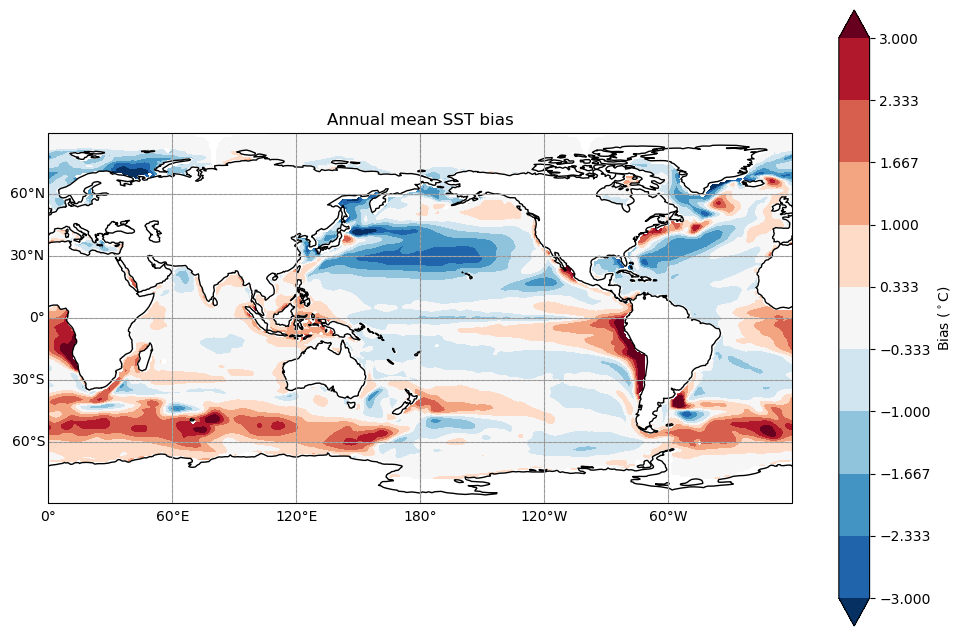

In [68]:
sst_bias(ctrl, hadsst1, "annual", plot=True, temp_scale=3)

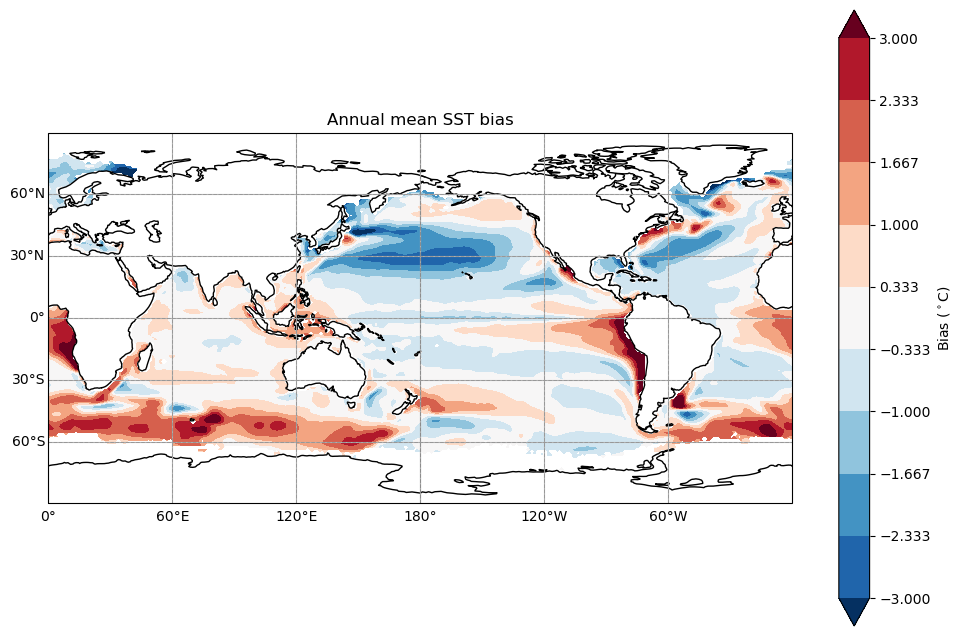

In [64]:
sst_bias(ctrl, detrend, "annual", plot=True, temp_scale=3)

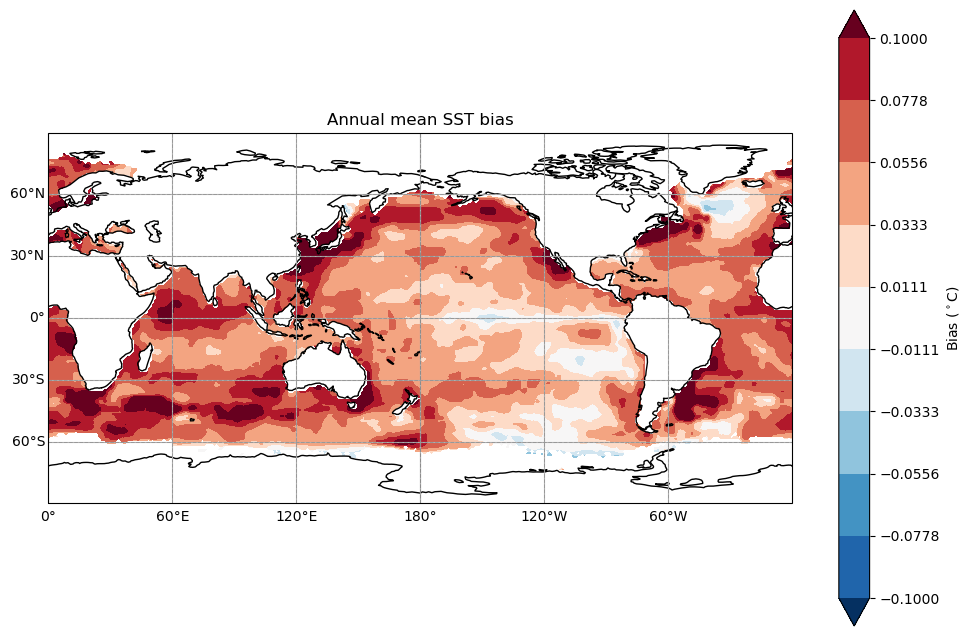

In [67]:
sst_bias(hadsst1, detrend, "annual", plot=True, temp_scale=0.1)

In [124]:
da_symmetric

<xarray.DataArray 'sst' (time: 4104, latitude: 180, longitude: 360)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,            nan,            nan, ...,
          0.0000000e+00,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00, -1.1920929e-07, -1.1920929e-07],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,            nan,            nan, ...,
          0.0000000e+00,            nan,            nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1679-01-31 1679-02-28 ... 2020-12-01
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5

In [70]:
da_symmetric.sel(longitude=170.0, latitude=-5.0, method='nearest')[1452]

<xarray.DataArray 'sst' ()>
array(0.14974594, dtype=float32)
Coordinates:
    time       datetime64[ns] 1900-01-16T12:00:00
    longitude  float64 170.5
    latitude   float64 -4.5

In [ ]:
da_symmetric

In [20]:
def fit_quadratic(vals):
    time = np.arange(len(vals))
    time2 = np.arange(-50*12, len(vals))

    poly = np.polyfit(time, vals, deg=2)
    return np.polyval(poly, time2)

# Apply the function along the time axis using np.apply_along_axis
extrapolated_values = np.apply_along_axis(fit_quadratic, axis=0, arr=anoms.values)

# Create a new DataArray from the extrapolated values
#add 50 years earlier to the coords

extrapolated_da = xr.DataArray(extrapolated_values, coords={"longitude":hadsst1.longitude, "latitude":hadsst1.latitude, "time":datetime_index}, dims=hadsst1.dims)


In [21]:
def fit_quadratic(vals):
    time = np.arange(len(vals))
    time2 = np.arange(-50*12, len(vals))

    # Find the quadratic coefficients for the time after 1850
    poly_after_1850 = np.polyfit(time[time>=12*100], vals[time>=12*100], deg=2)
    
    # Use the quadratic coefficients after 1850 to determine the quadratic coefficients before 1850
    poly_before_1850 = np.array([0., 0., vals[0] - np.polyval(poly_after_1850, 0)])
    
    # Combine the coefficients before and after 1850
    poly = np.concatenate([poly_before_1850, poly_after_1850])
    
    return np.polyval(poly, time2)

In [22]:
extrapolated_values = np.apply_along_axis(fit_quadratic, axis=0, arr=anoms.values)

# Create a new DataArray from the extrapolated values
#add 50 years earlier to the coords

extrapolated_da = xr.DataArray(extrapolated_values, coords={"longitude":hadsst1.longitude, "latitude":hadsst1.latitude, "time":datetime_index}, dims=hadsst1.dims)


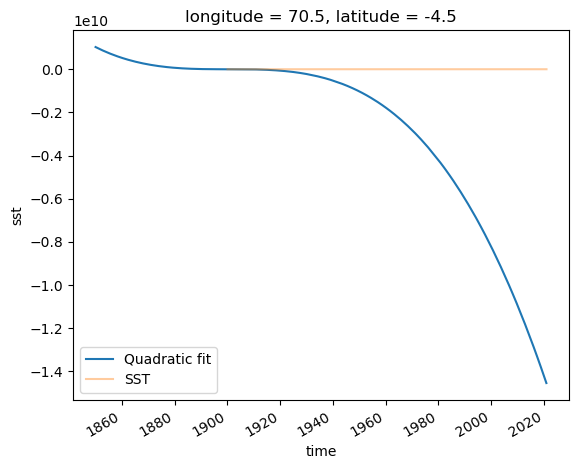

In [23]:
extrapolated_da.sel(longitude=150.0, latitude=-5.0, method='nearest').plot(label = 'Quadratic fit')
anoms.sel(longitude=70.0, latitude=-5.0, method='nearest').plot(alpha = 0.4, label = 'SST')
plt.legend()

In [123]:
def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

In [132]:
da= anoms.sel(longitude = 170, latitude  = -5, method = 'nearest')

In [133]:
da['time'] = np.arange(50, 50 + len(da['time']))
da = da.transpose('time', ...)

In [139]:
detrend_factor = quadratic(da['time'], a, b, c)
detrended_da = da / detrend_factor

NameError: name 'a' is not defined

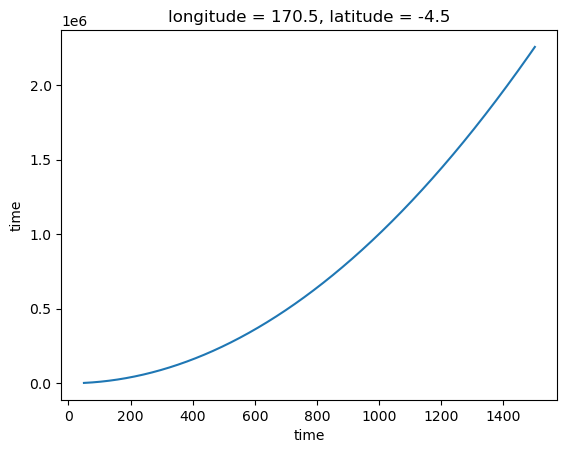

In [138]:
detrend_factor.plot()

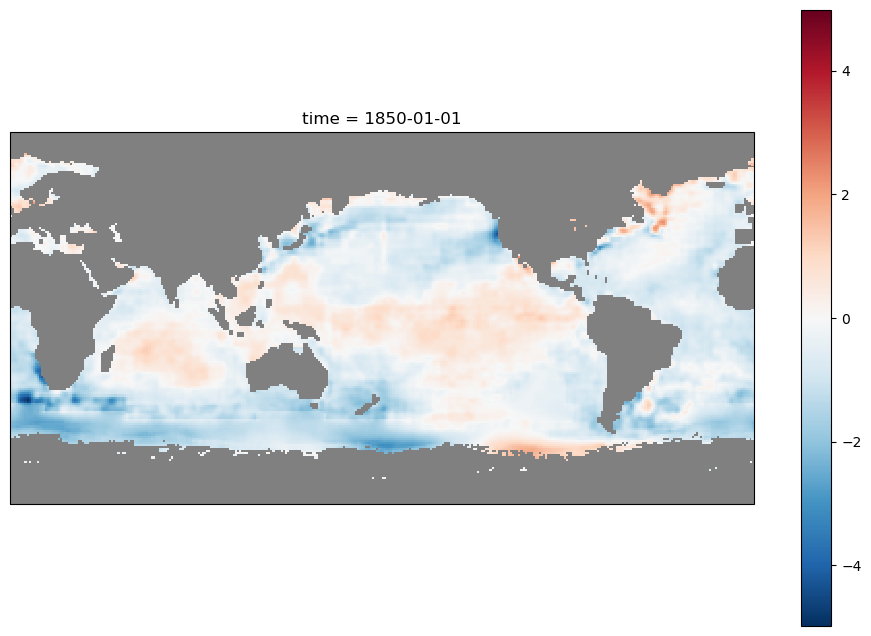

In [22]:
plt.figure(figsize = (12,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
extrapolated_da[0].plot.pcolormesh(transform=ccrs.PlateCarree(), ax = ax)#, levels = 10, vmin  = -3, vmax = 3, cmap = 'RdBu_r', extend ='both')
ax.set_facecolor('grey')


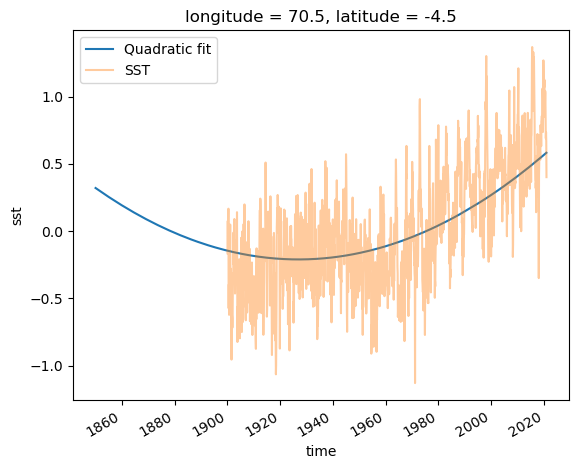

In [23]:
extrapolated_da.sel(longitude=150.0, latitude=-5.0, method='nearest').plot(label = 'Quadratic fit')
anoms.sel(longitude=70.0, latitude=-5.0, method='nearest').plot(alpha = 0.4, label = 'SST')
plt.legend()

In [24]:
#fit to GMSST
GMSSTa = anoms.mean(['latitude', 'longitude'])
extrap_GMSST = np.apply_along_axis(fit_quadratic, axis=0, arr=GMSSTa.values)
e_GMSSTA_da = xr.DataArray(extrap_GMSST, coords={"time":datetime_index}, dims=GMSSTa.dims)


Text(0.5, 1.0, 'Global mean SST and trend')

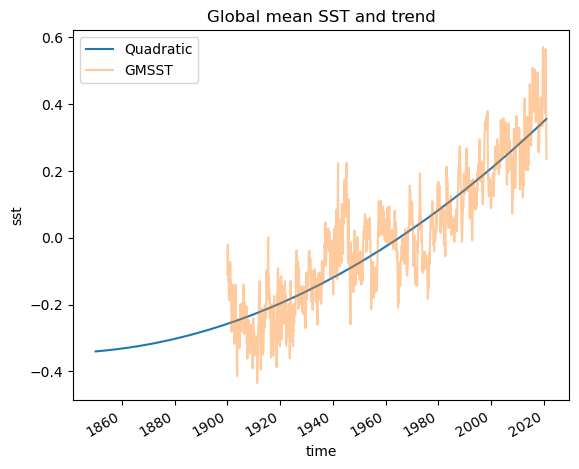

In [25]:
e_GMSSTA_da.plot(label = 'Quadratic')
GMSSTa.plot(alpha = 0.4, label = 'GMSST')
plt.legend()
plt.title('Global mean SST and trend')

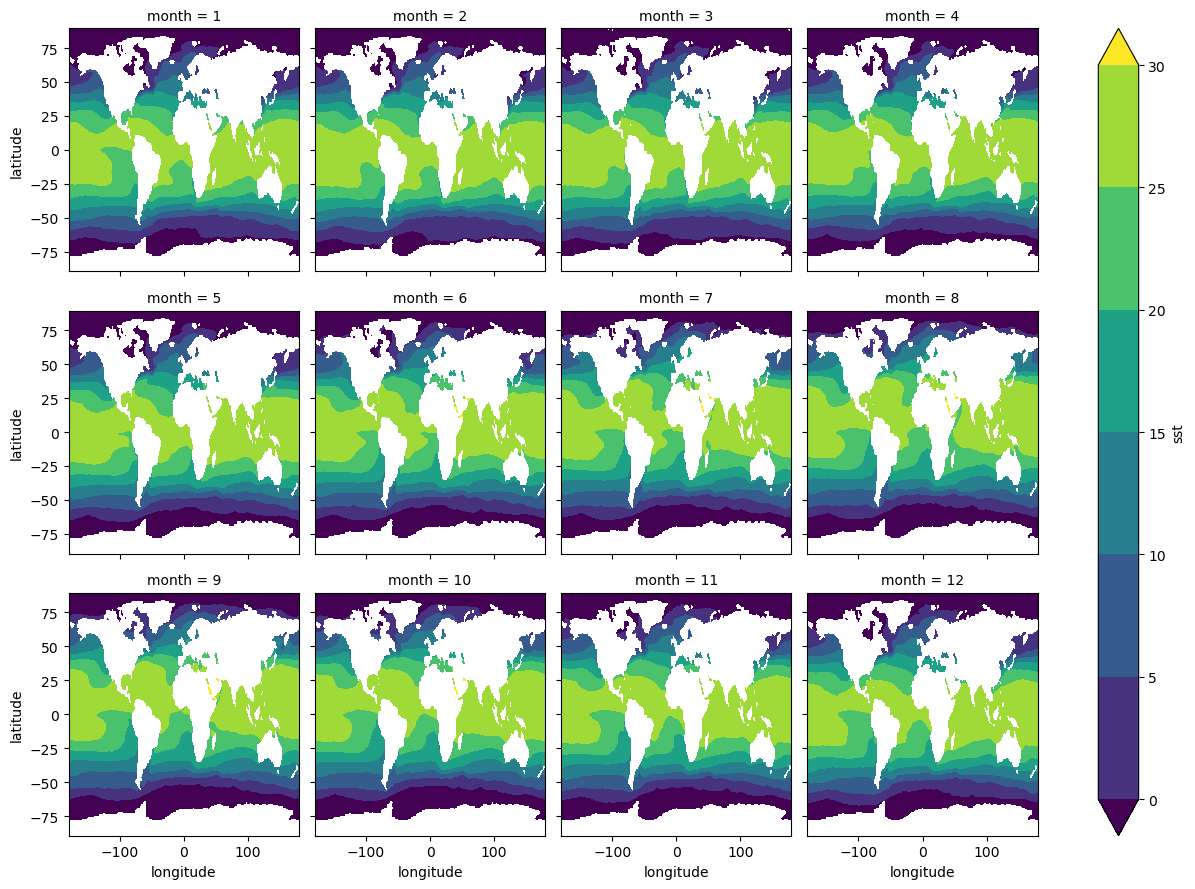

In [30]:
(clim + e_GMSSTA_da[0].values).plot.contourf(col = 'month', col_wrap = 4, vmin = 0, vmax = 30)

In [57]:
extrapolated_da.sel(longitude=150.0, latitude=0.0, method='nearest').plot()


TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'numpy.str_'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3b66605940> (for post_execute):


TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'numpy.str_'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'numpy.str_'

<Figure size 640x480 with 1 Axes>

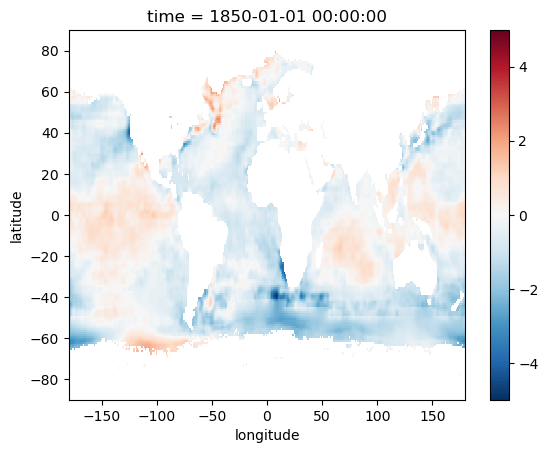

In [36]:
(extrapolated_da)[0].plot()

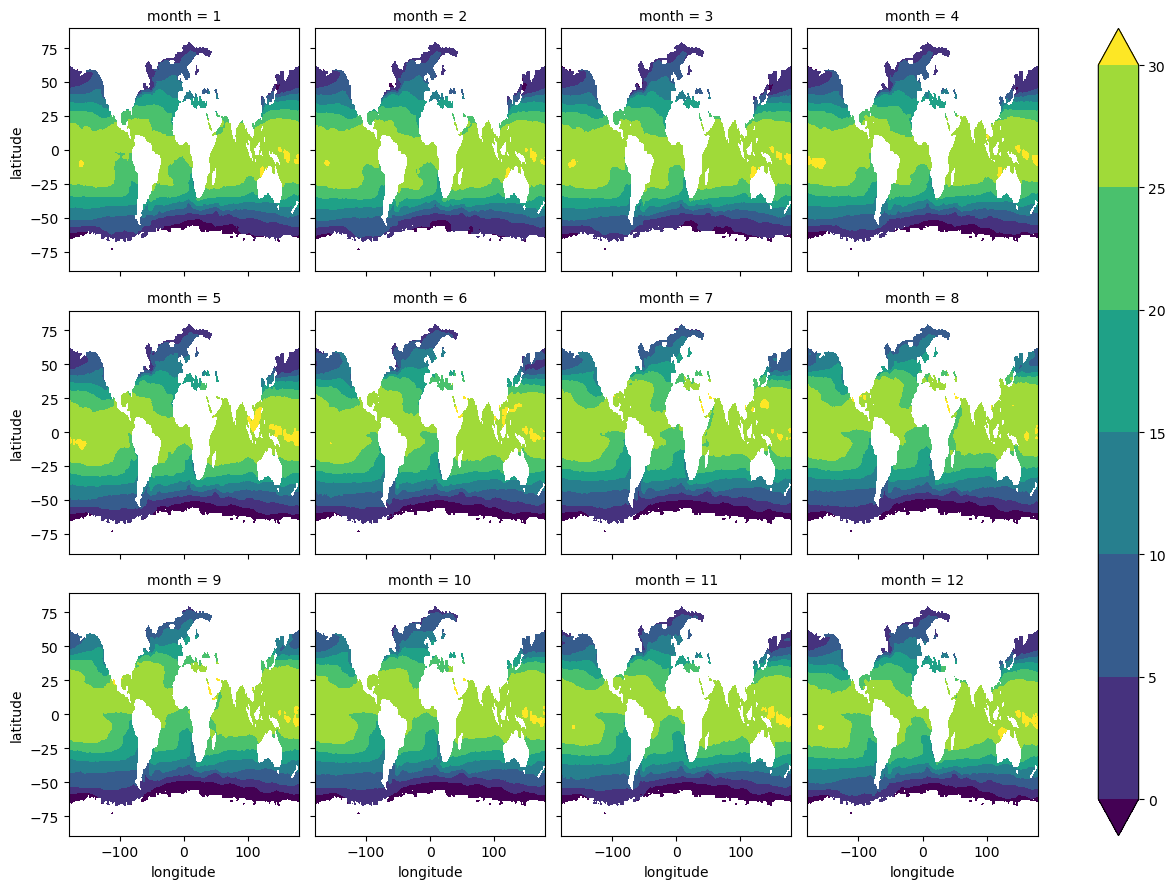

In [19]:
(clim + extrapolated_da[0].drop('time')).plot.contourf(col = 'month', col_wrap = 4, vmin = 0, vmax = 30)

In [ ]:
#fit quadratic to 

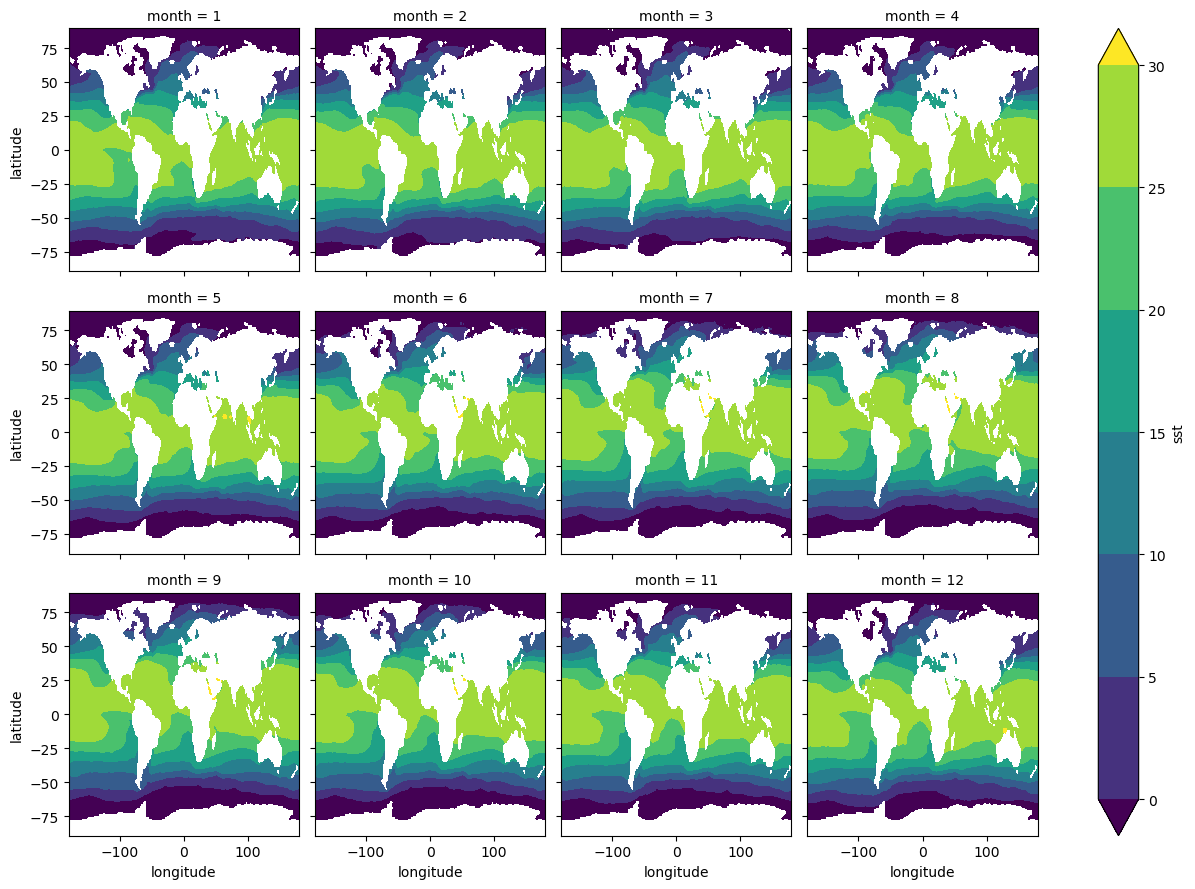

In [20]:
clim.plot.contourf(col = 'month', col_wrap = 4, vmin = 0, vmax = 30)

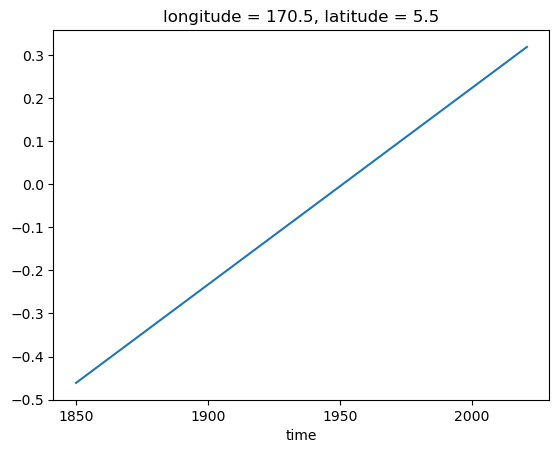

In [29]:
extrapolated_da.sel(longitude=170.0, latitude=5.0, method='nearest').plot()

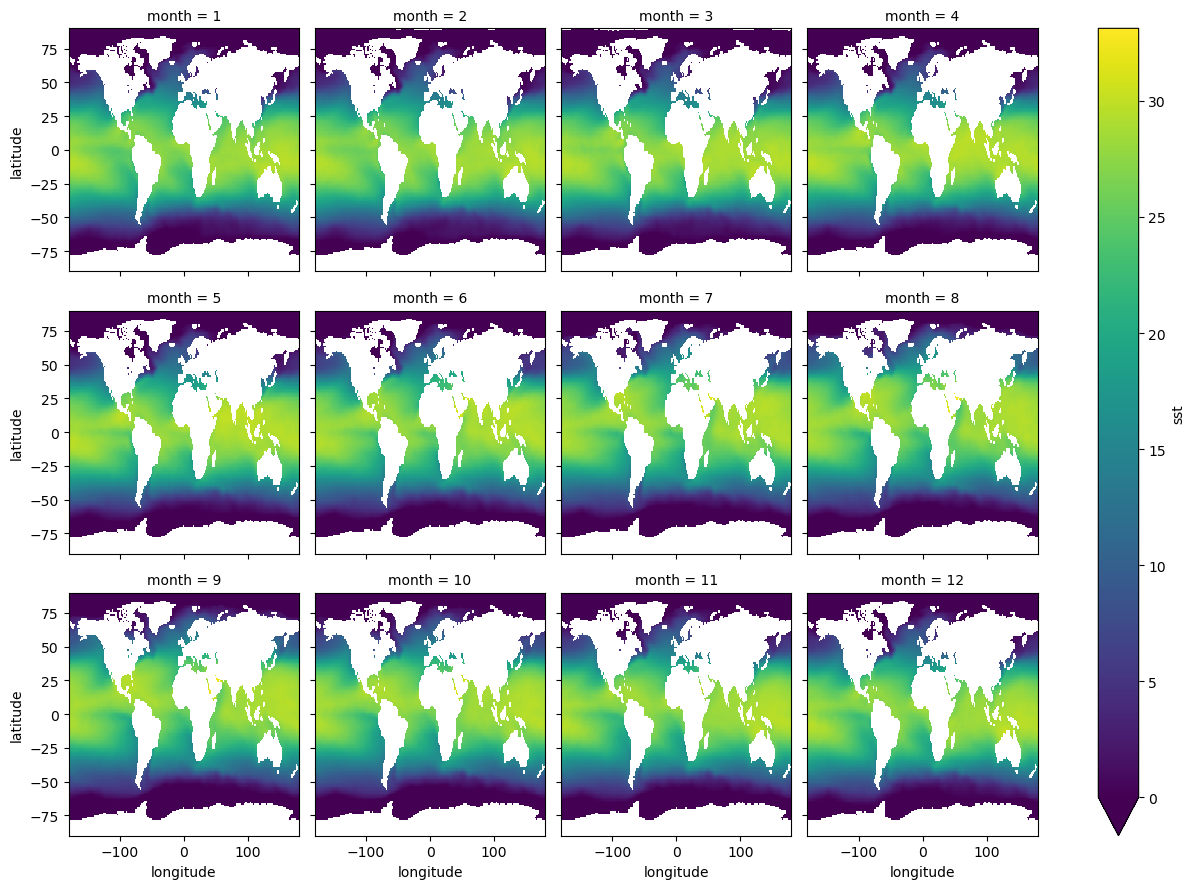

In [160]:
hadsst1.groupby('time.month').mean('time').plot(col = 'month', col_wrap = 4, vmin = 0)

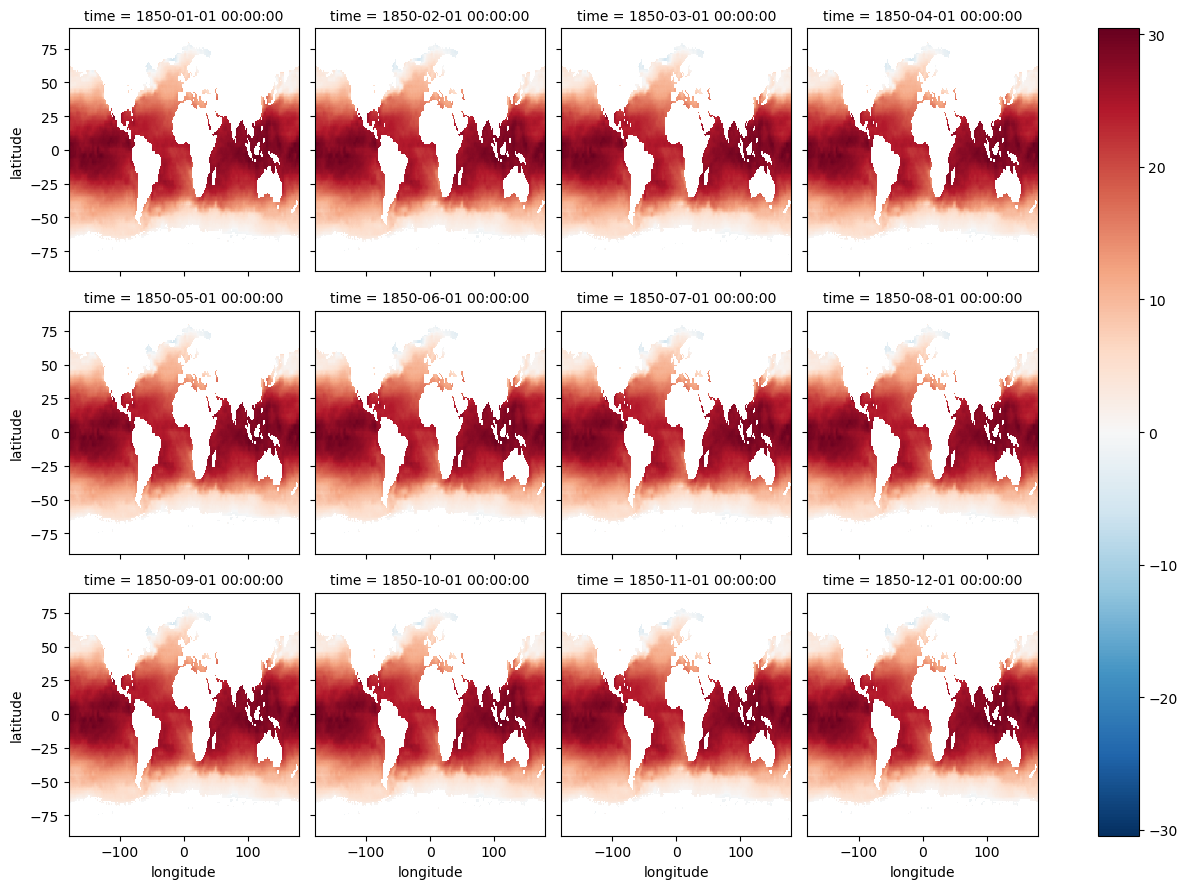

In [162]:
extrapolated_da.sel(time=slice("1850-01-01", "1850-12-31")).plot(col = 'time', col_wrap = 4)

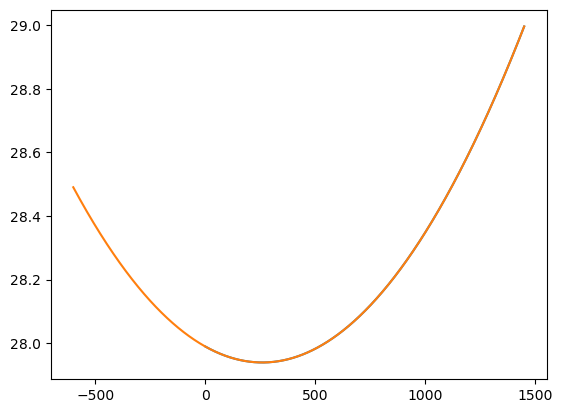

In [81]:
plt.plot(X, np.polyval(poly, X))
plt.plot(PI, np.polyval(poly, PI))


In [25]:
len(PI)

2052

In [49]:
test = detrend_dim(hadsst1, dim = "time", deg = 2)

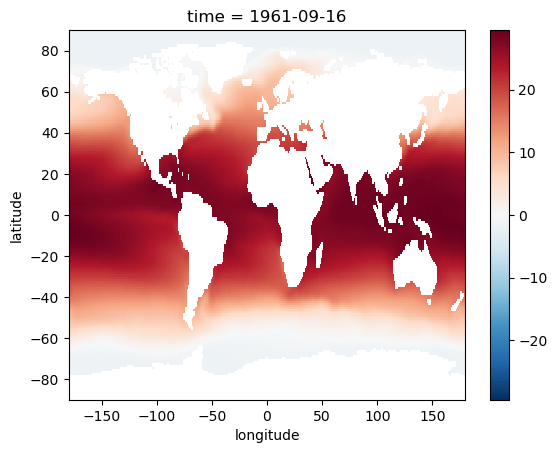

In [34]:
test[1100].plot()

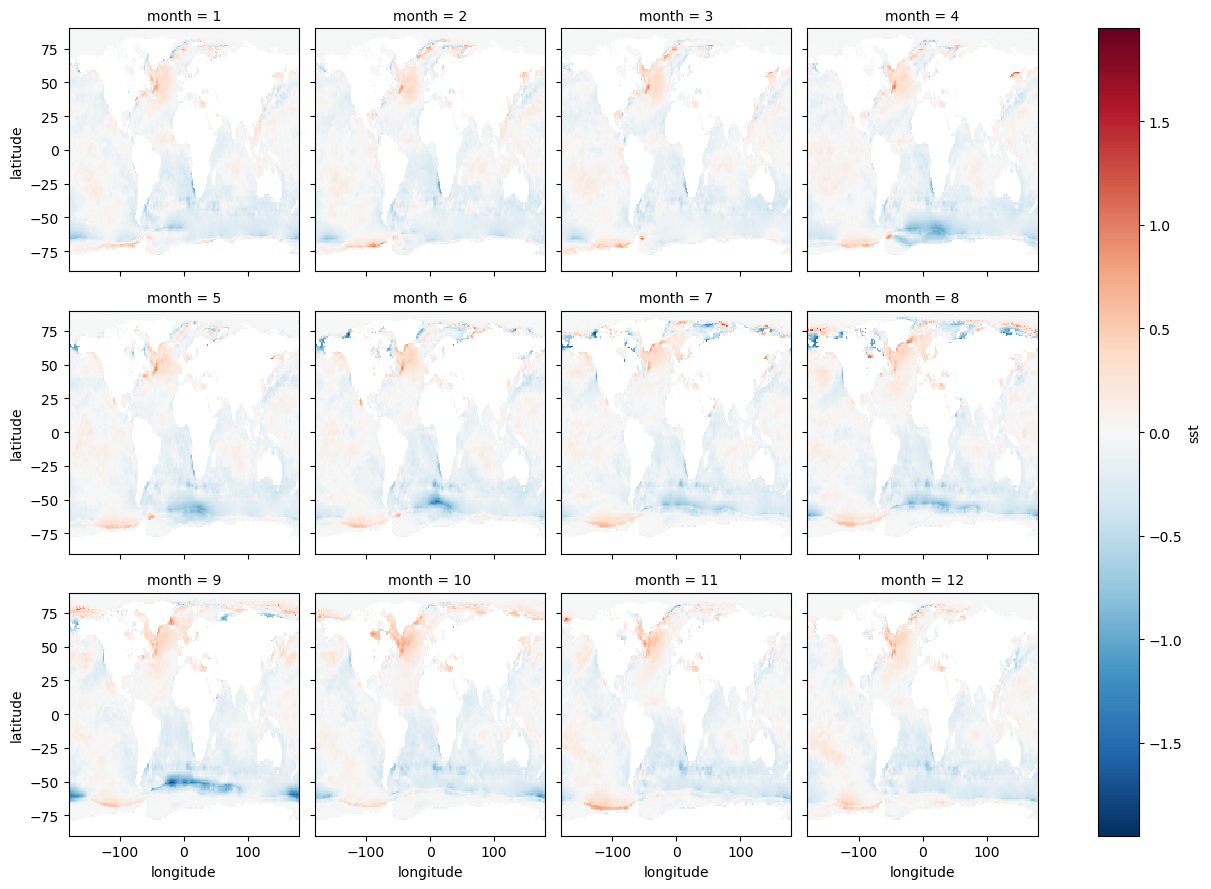

In [30]:
(hadsst1.groupby('time.month') - hadsst1.sel(time=slice('1961-01-01', '1990-12-31')).groupby('time.month').mean('time')).groupby('time.month').mean('time').plot(col = 'month', col_wrap = 4)

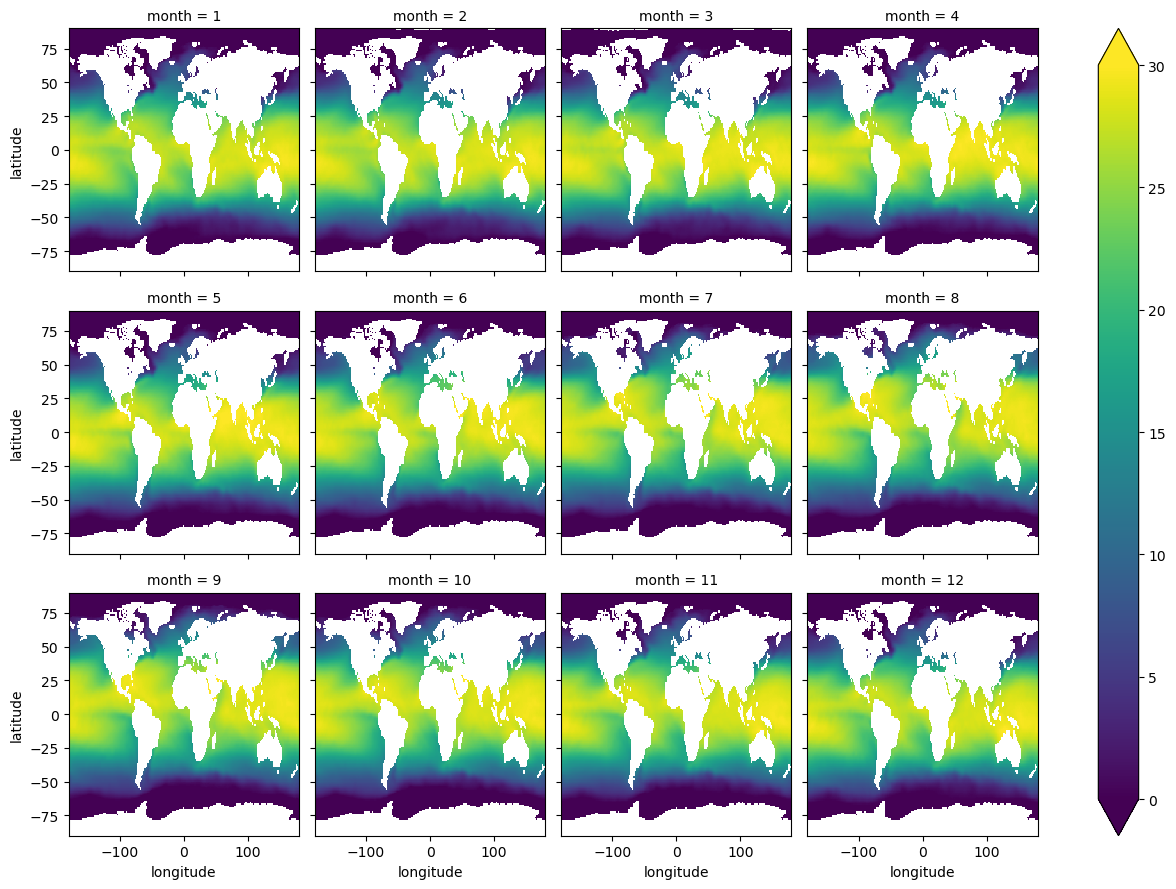

In [31]:
(hadsst1 - test).groupby('time.month').mean('time').plot(col = 'month', col_wrap = 4, vmin = 0, vmax = 30)

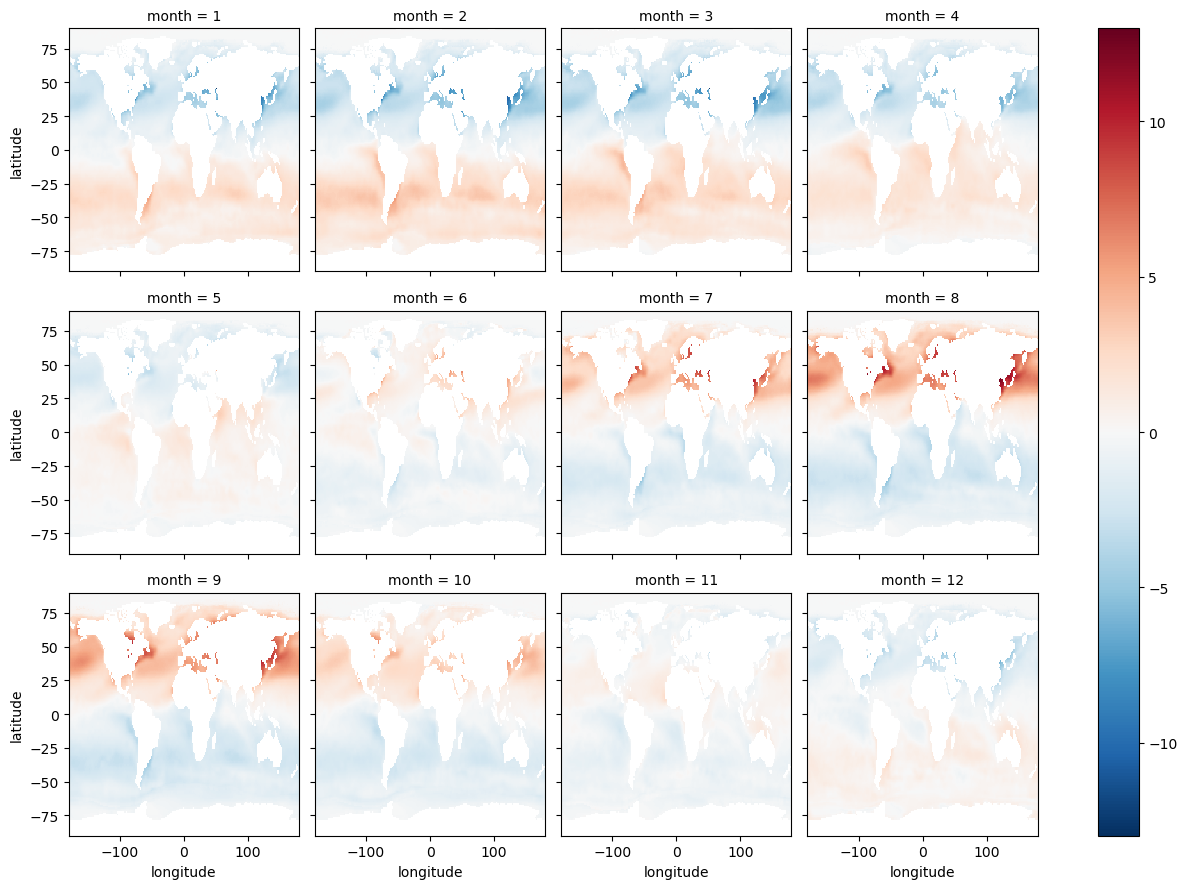

In [36]:
(hadsst1 - test).groupby('time.month').mean('time').plot(col = 'month', col_wrap = 4)

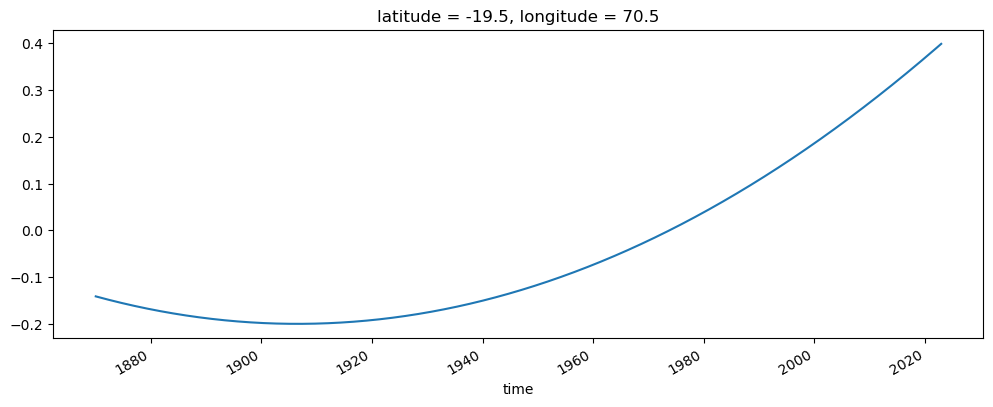

In [50]:
plt.figure(figsize = (12,4))
(test).sel(longitude=70.0, latitude=-20.0, method='nearest').plot()
#(hadsst1).sel(longitude=70.0, latitude=-20.0, method='nearest').plot()
#(hadsst1-test).sel(longitude=70.0, latitude=-20.0, method='nearest').plot()


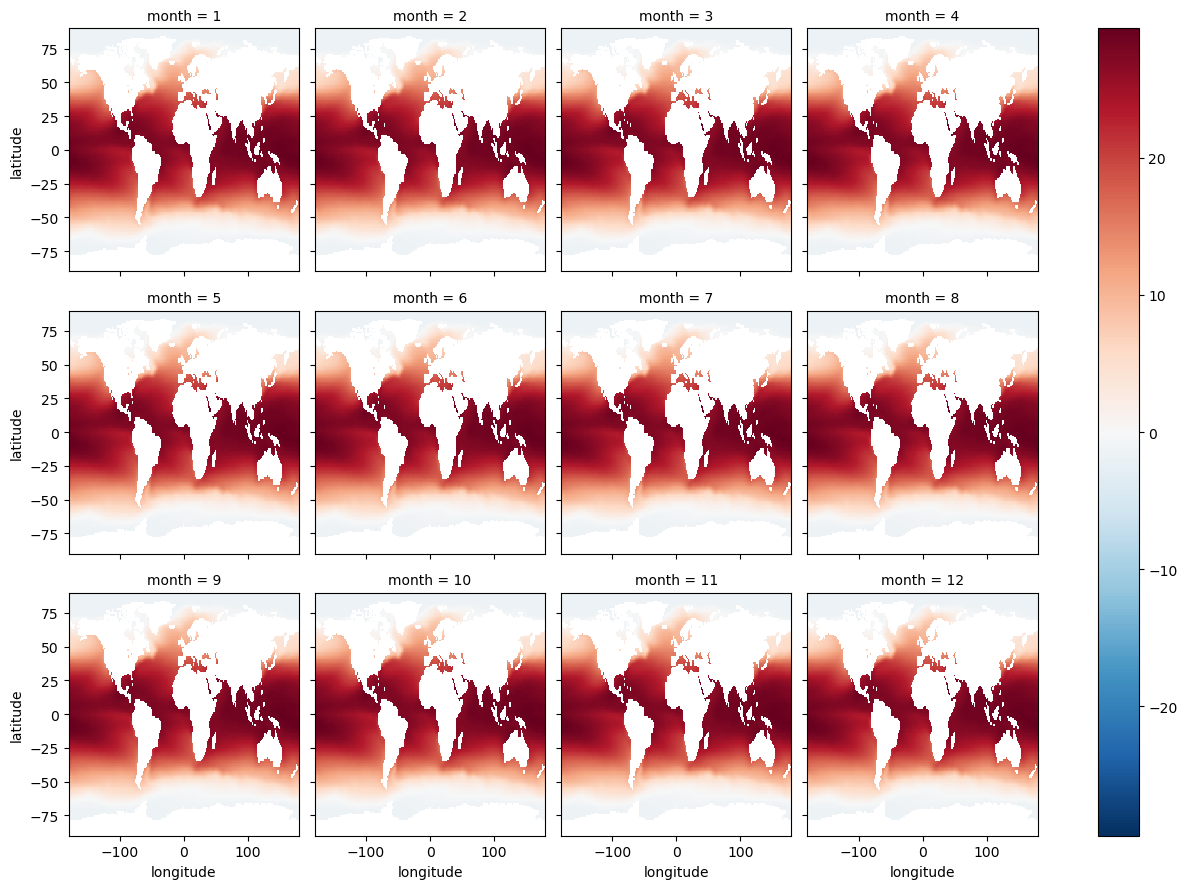

In [35]:
test.groupby('time.month').mean('time').plot(col = 'month', col_wrap = 4)

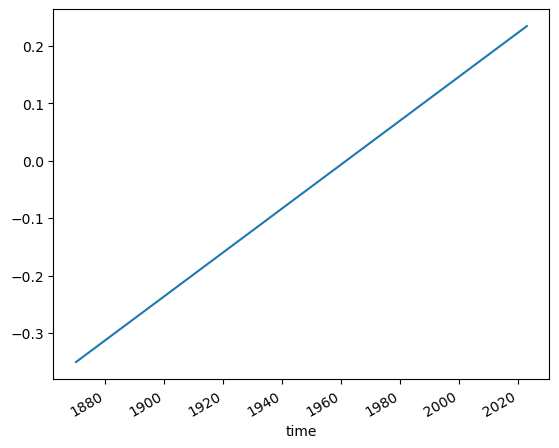

In [13]:
test.mean(['latitude', 'longitude']).plot()

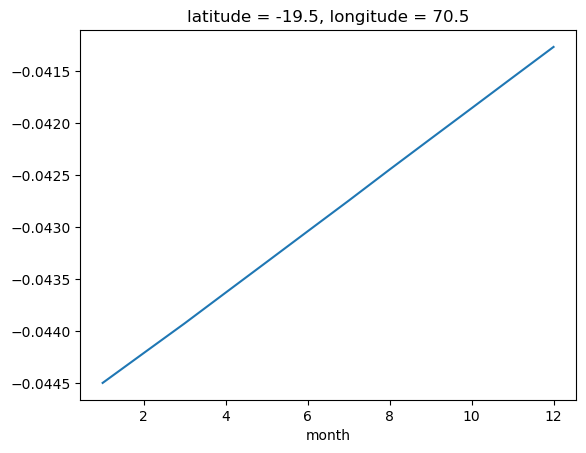

In [15]:
(test).sel(longitude=70.0, latitude=-20.0, method='nearest').groupby('time.month').mean('time').plot()
#test.sel(longitude=-170.0, latitude=-21.0, method='nearest').plot()
#(hadsst1).sel(longitude=70.0, latitude=-20.0, method='nearest').groupby('time.year').mean('time').plot()


In [71]:
hadsst1

<xarray.DataArray 'sst' (time: 1837, latitude: 180, longitude: 360)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
...
        ...,
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ..., -1.8, -1.8, -1.8],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 2023-01-16T12:00:00
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5

In [55]:
GMSST = hadsst1.mean(['latitude', 'longitude'])

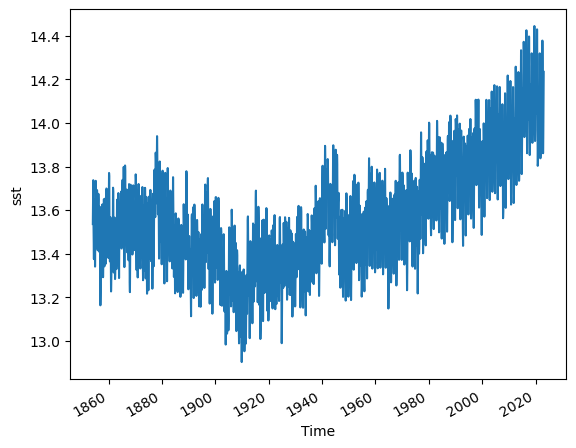

In [58]:
GMSST.plot()

In [57]:
GMSST = ersstv5.mean(['latitude', 'longitude'])

In [59]:
GM_T = detrend_dim(GMSST, dim = "time")

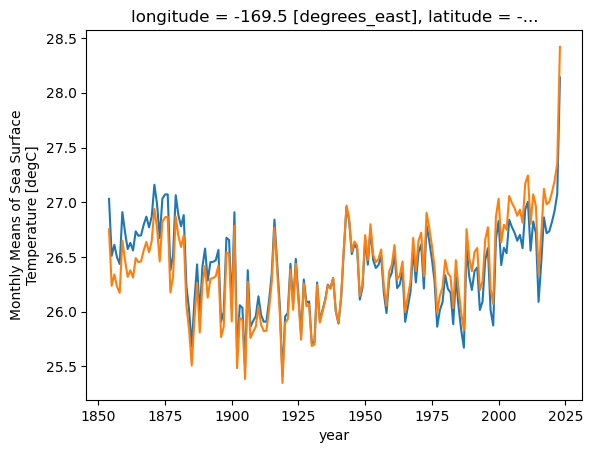

In [64]:
(ersstv5 - GM_T).sel(longitude=-170.0, latitude=-20.0, method='nearest').groupby('time.year').mean('time').plot()
(ersstv5).sel(longitude=-170.0, latitude=-20.0, method='nearest').groupby('time.year').mean('time').plot()

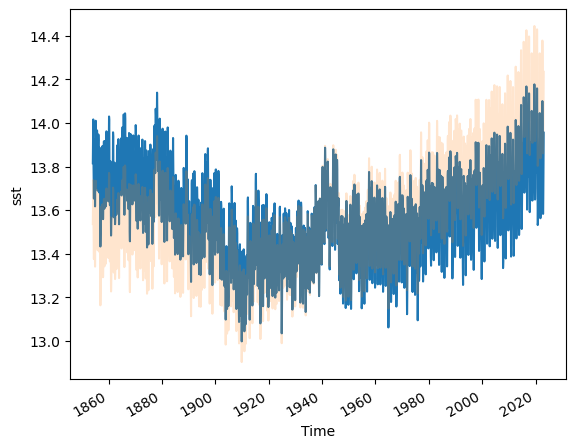

In [67]:
(GMSST - GM_T).plot()
GMSST.plot(alpha = 0.2)